# Authentification Attacks ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Auth_model\\"
file_path = '.\Files\\Auth\\'

## Preprocessing data for binary classification (Auth or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [4]:
dict_3_classes = {}
dict_3_classes['Mirai-greeth_flood'] = 'Auth'
dict_3_classes['Mirai-greip_flood'] = 'Auth'
dict_3_classes['Mirai-udpplain'] = 'Auth'
dict_3_classes['DNS_Spoofing'] = 'Auth'
dict_3_classes['MITM-ArpSpoofing'] = 'Auth'
dict_3_classes['DictionaryBruteForce'] = 'Auth'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'

### Refactoring data

In [5]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [03:39<00:00,  1.30s/it]


### Counting number of samples per class

14


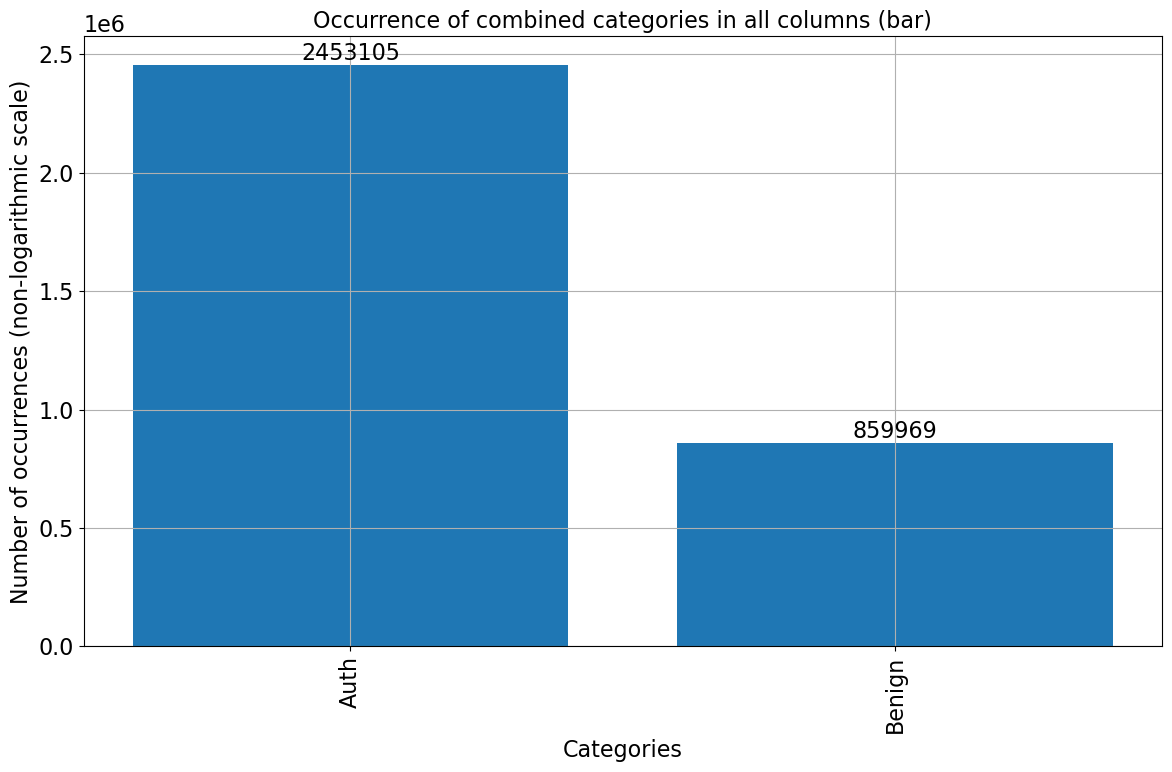

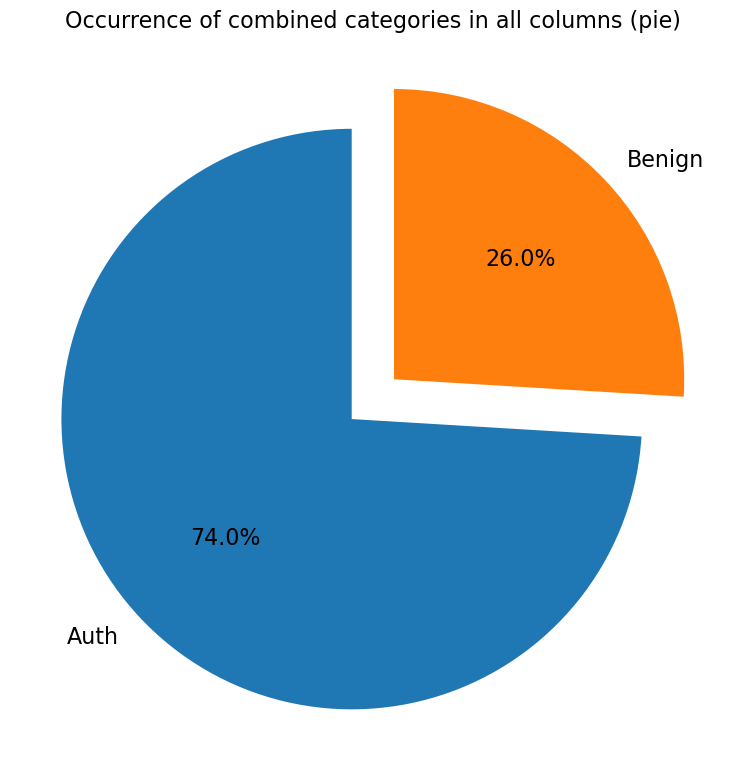

In [3]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurrence of combined categories in all columns (bar)', 'Categories', 'Number of occurrences', 12, 8, model_repo, log_scale=False)
plot_pie_chart(count_label(train_sets, file_path=file_path), 'Occurrence of combined categories in all columns (pie)', 12, 8, model_repo)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\Auth\\'
model_path_binary = '.\\Auth_model\\Binary\\'
local_path = '.\\Auth_model\\'
model_path_all_classes = '.\\Auth_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

14
47


## First model (Binary (Auth or Benigh))

### Building model

In [7]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00,  9.49it/s]


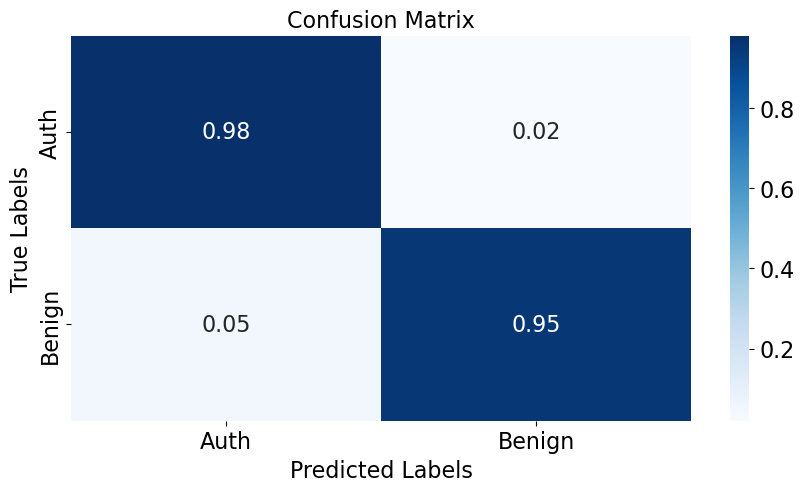

100%|██████████| 2/2 [00:00<00:00, 11.10it/s]


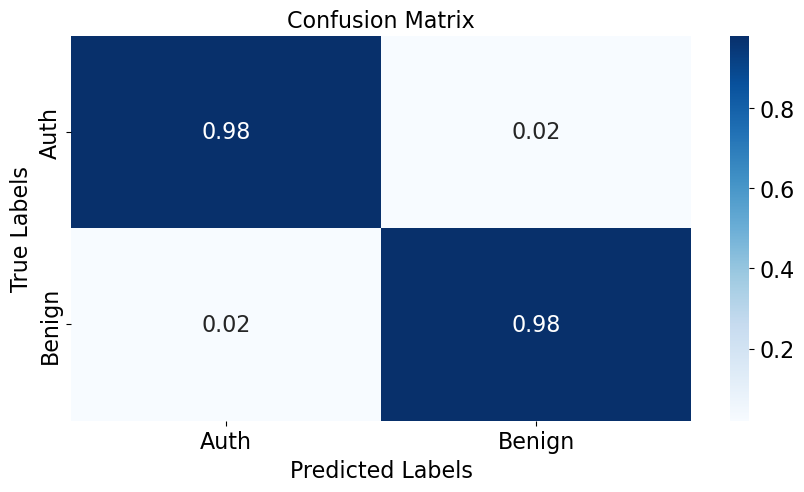

100%|██████████| 2/2 [00:00<00:00,  9.90it/s]


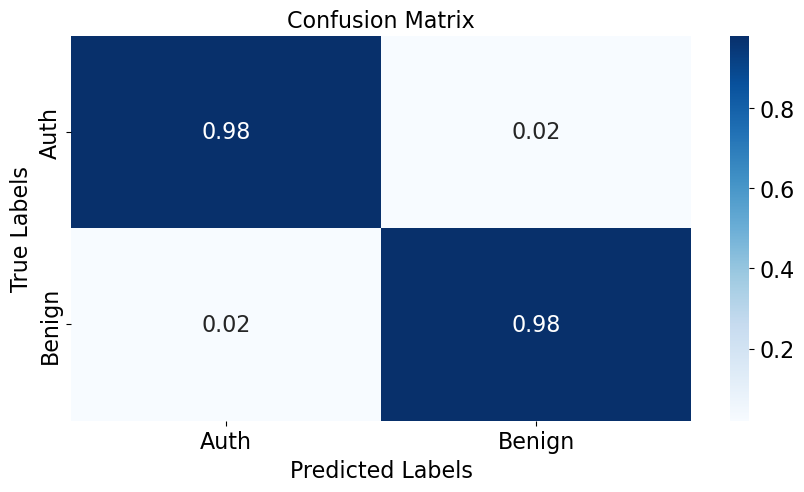

100%|██████████| 2/2 [00:00<00:00,  9.16it/s]


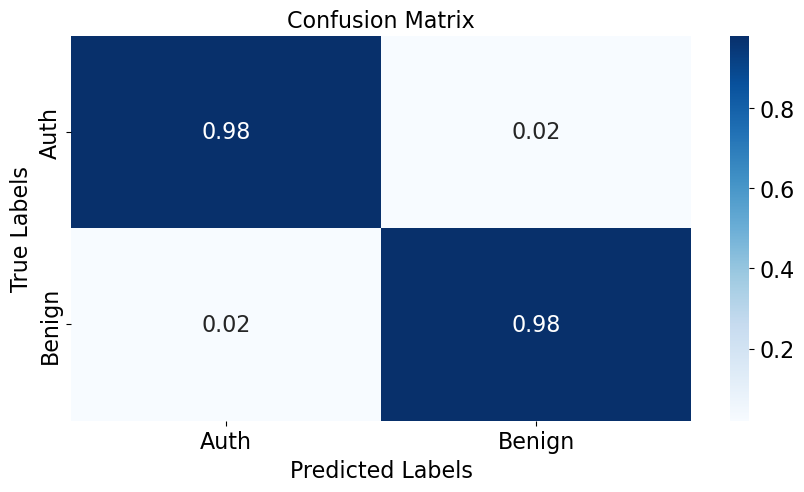

100%|██████████| 2/2 [00:00<00:00, 10.57it/s]


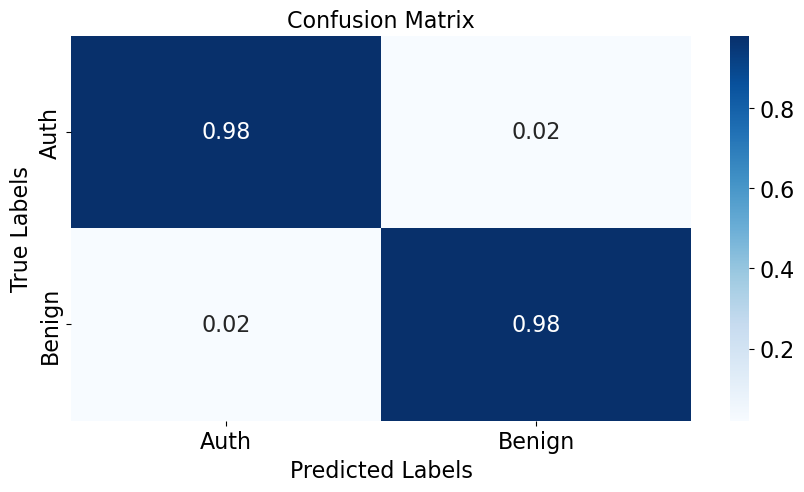

 56%|█████▌    | 5/9 [14:16<12:16, 184.22s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 2/2 [00:00<00:00,  9.98it/s]


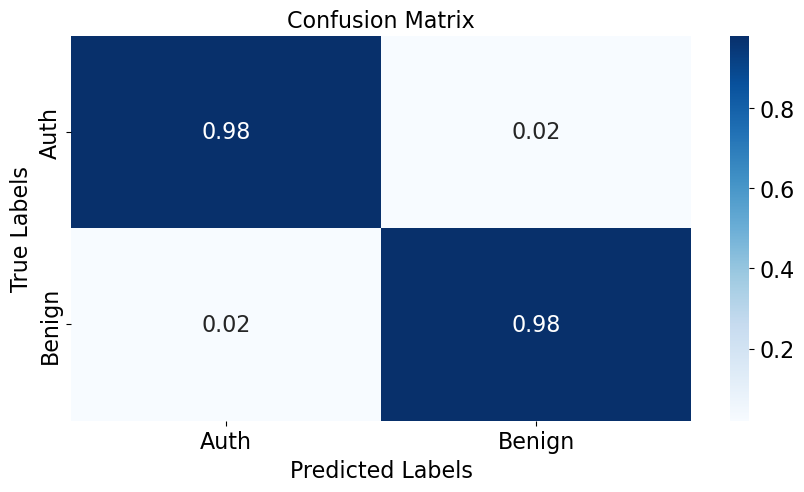

100%|██████████| 2/2 [00:00<00:00, 10.50it/s]


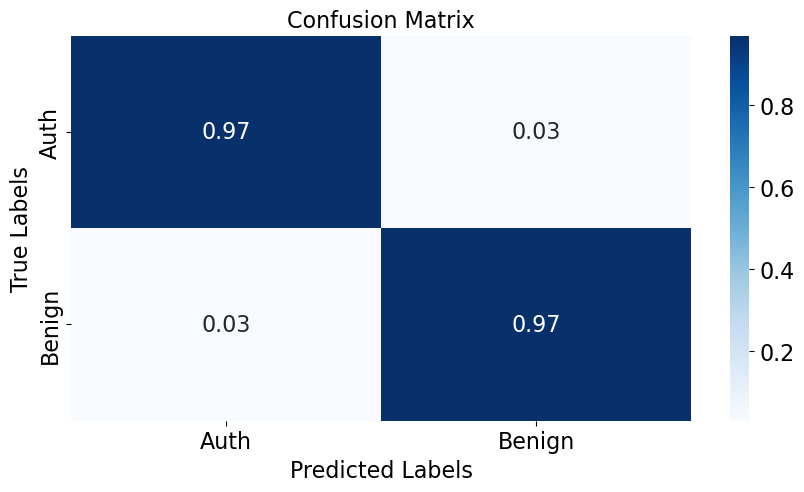

100%|██████████| 2/2 [00:00<00:00, 10.85it/s]


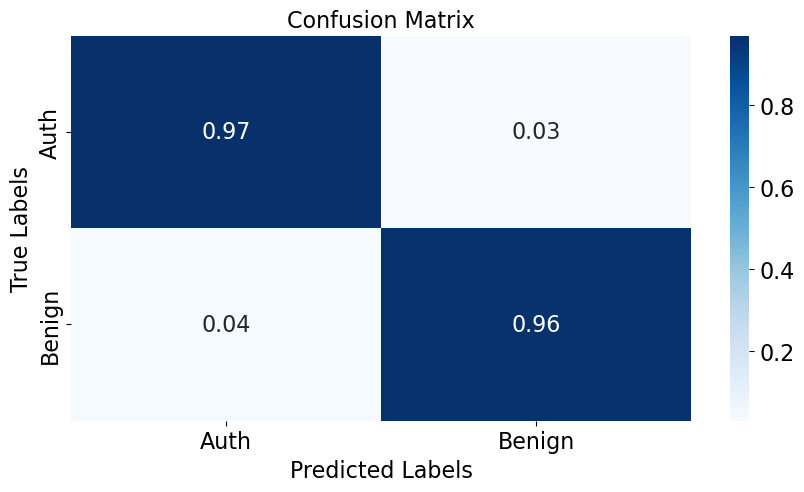

100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


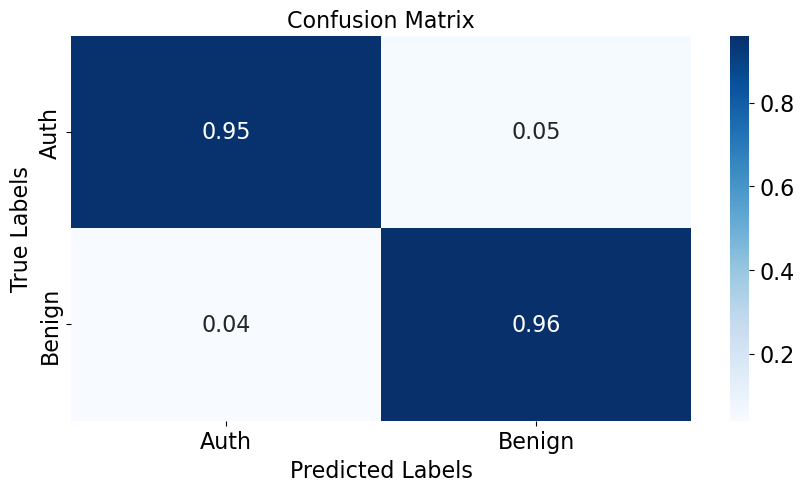

100%|██████████| 9/9 [1:47:28<00:00, 716.54s/it] 


['.\\Auth_model\\Binary\\encoder.joblib']

In [8]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (10, 5)
saveConfusionMatrix = False
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_'+model['Name'], train_sets, test_sets, file_path, performance, model_path_binary+'SF_', X_columns=selected_X, y_column=z_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_binary+'SF_'+model['Name'], figsize=figsizeConfusionMatrix)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

#### Complex models

In [5]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, RF)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (Cat)",
        "Model": BaggingClassifier(base_estimator=CatBoostClassifier(random_state = 42, verbose = 0), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, XGB, RF)",
        "Model": StackingClassifier([
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            final_estimator=CatBoostClassifier(random_state = 42, verbose = 0),
            cv=5)
    },
]

In [6]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in complexModelsDitionnary:
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary + "complex_", X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


['.\\Auth_model\\Binary\\encoder.joblib']

#### Feature Importance

In [5]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_binary+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_binary+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_binary+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_binary+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_binary+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_binary+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_binary+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 198.85it/s]


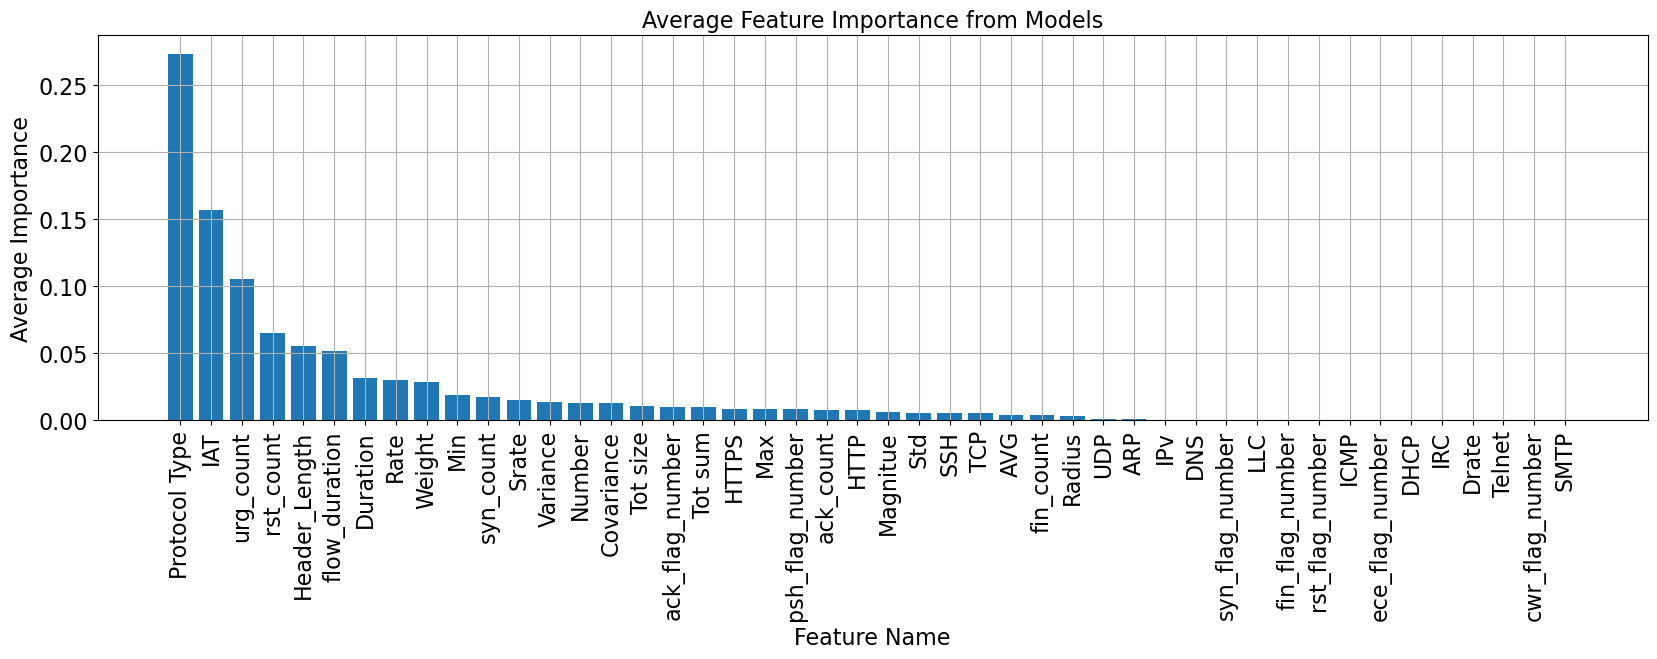

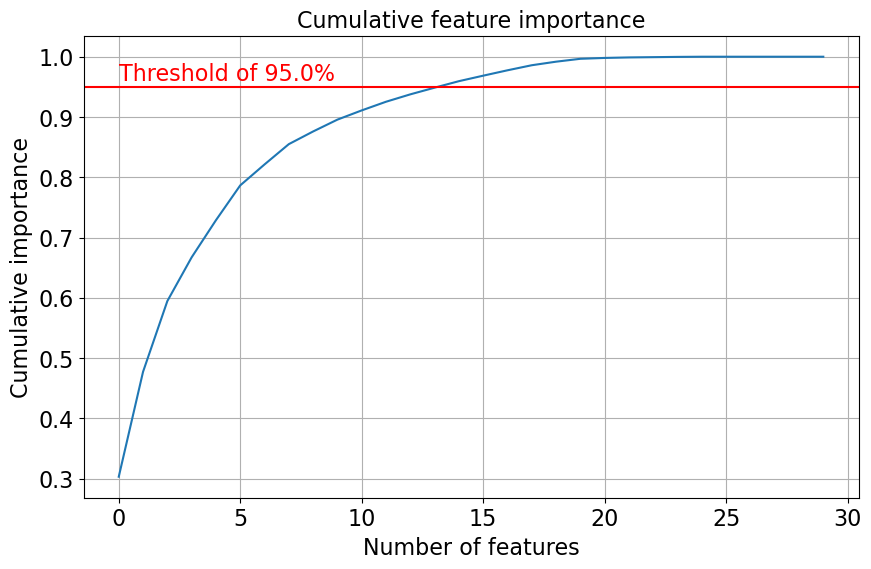

['Protocol Type', 'IAT', 'urg_count', 'rst_count', 'Header_Length', 'flow_duration', 'Duration', 'Rate', 'Min', 'syn_count', 'Variance', 'Covariance', 'Tot size', 'ack_flag_number']


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


In [6]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_binary, all_features=True)
average_importance_df.to_csv(model_path_binary+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\Auth\\Binary\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_binary+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(read_csv_file(train_sets[0], file_path)[X_columns], average_importance_df, threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_binary, threshold_percentage=0.95)
pd.DataFrame(selected_X).to_csv(model_path_binary+'selected_X_columns.csv', index=False)
print(selected_X)

# Define and fit scaler
scaler = MinMaxScaler()
for train_set in tqdm(train_sets):
    scaler.fit(read_csv_file(train_set, file_path)[selected_X])

##### Some plots

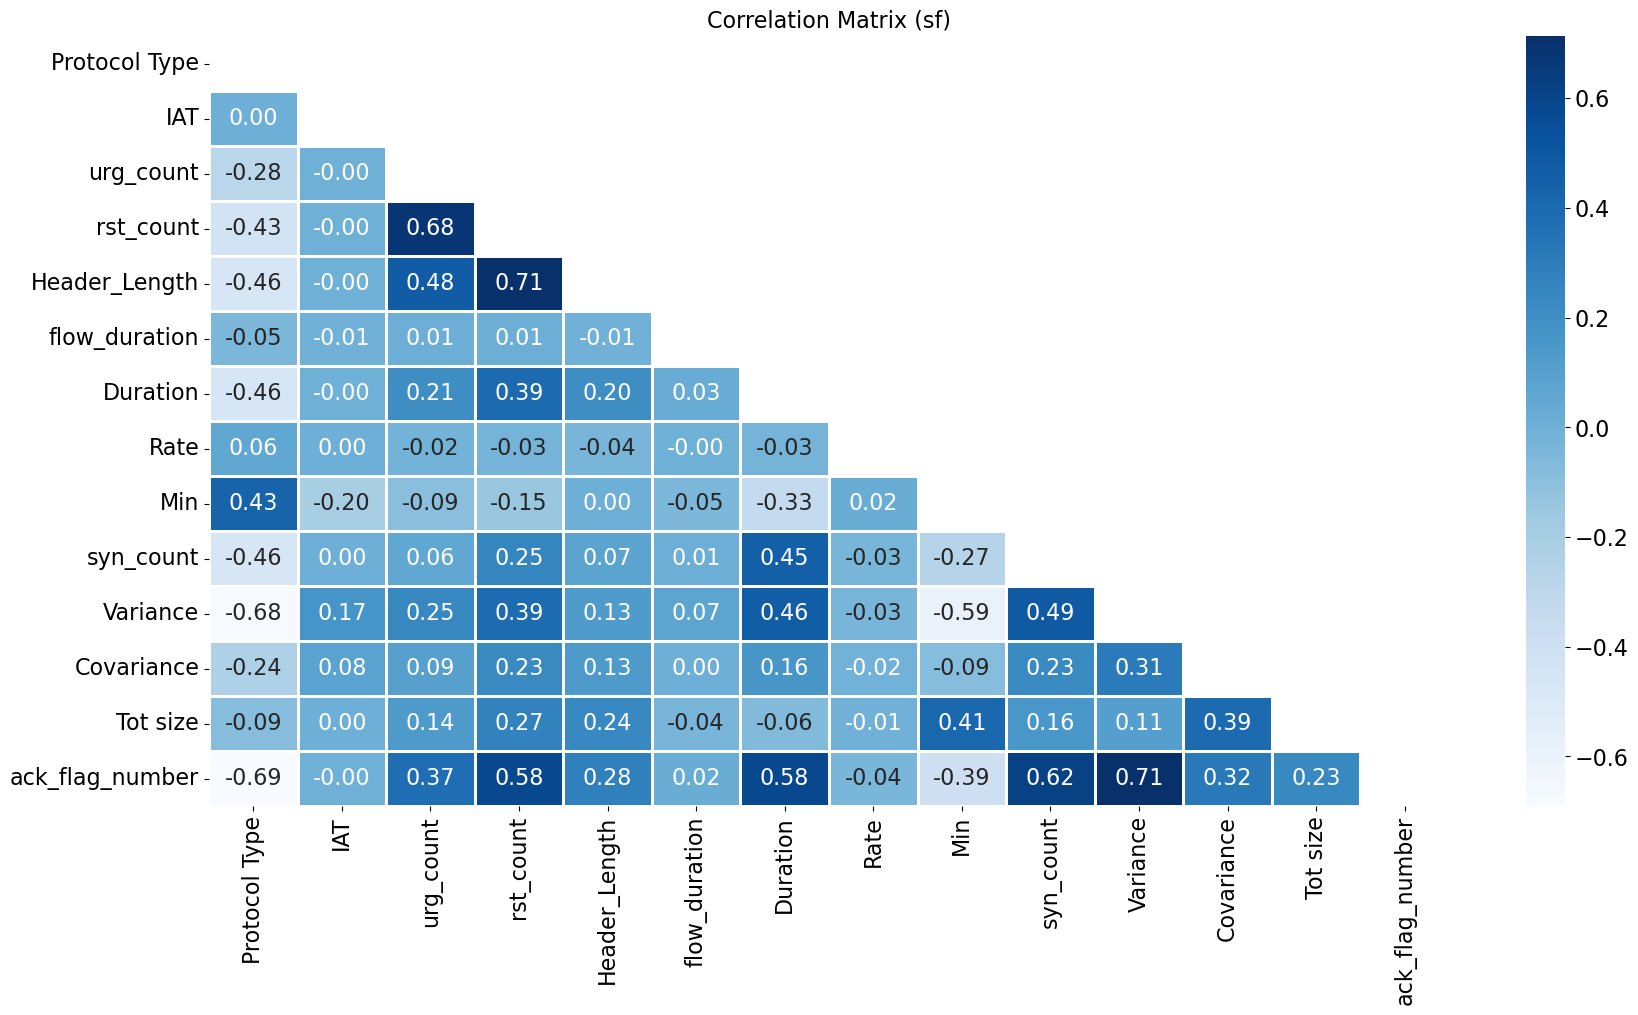

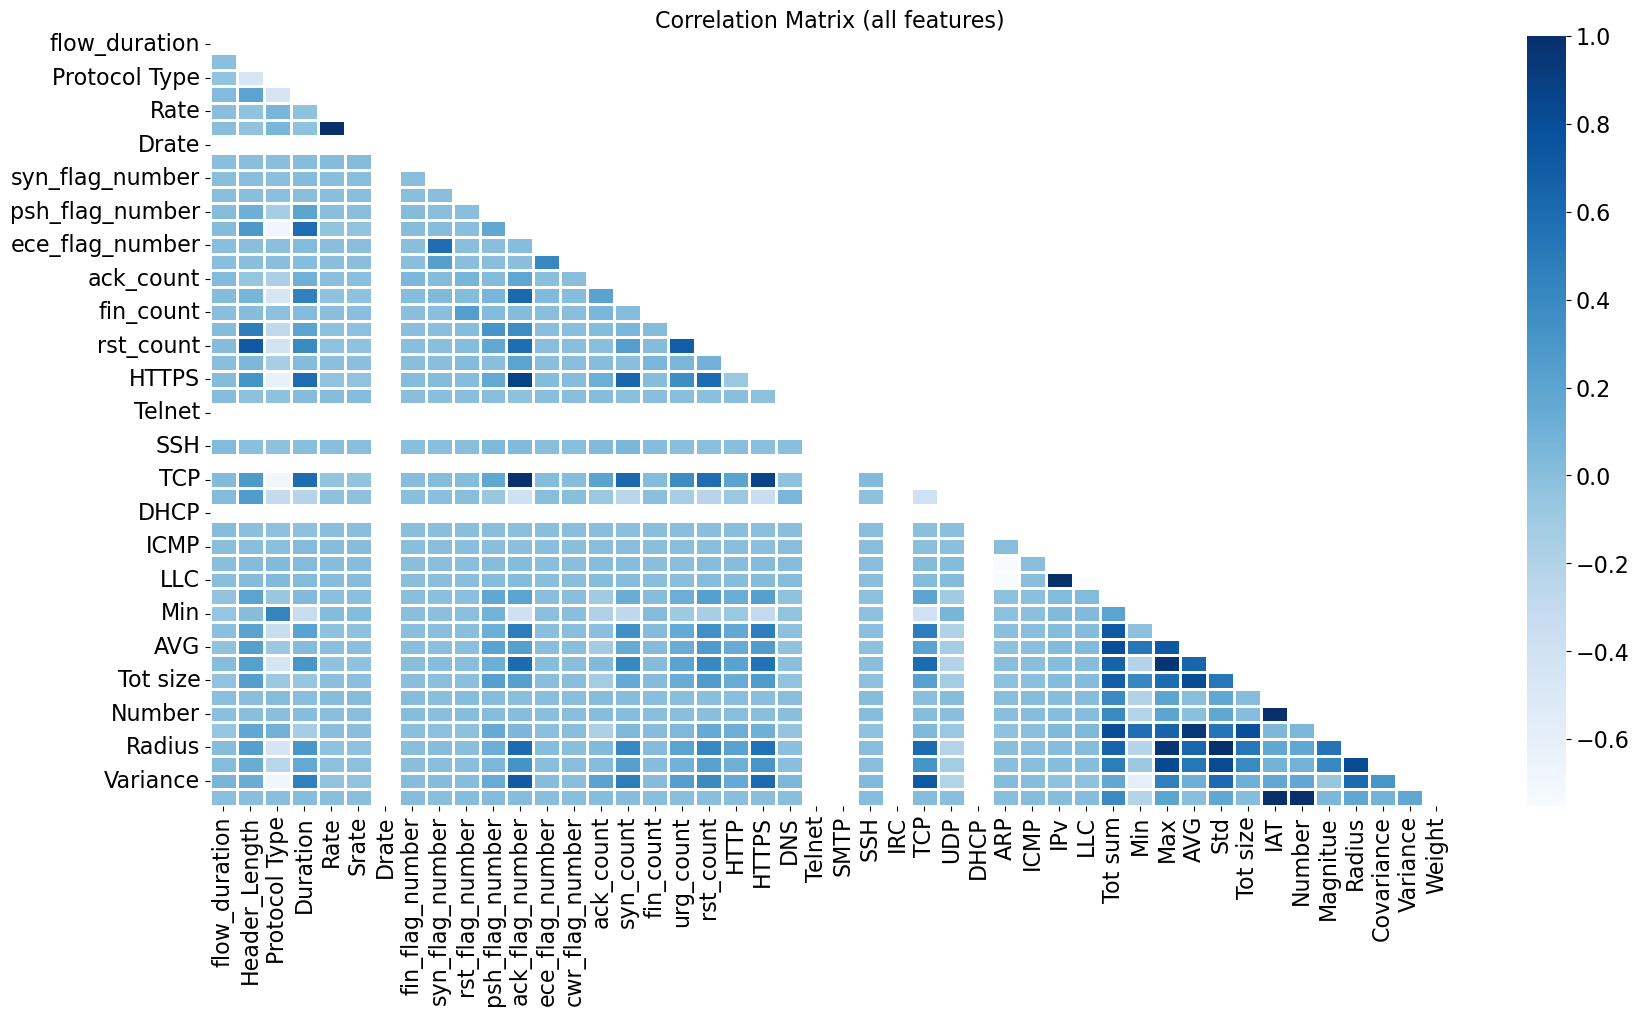

<Figure size 2000x1000 with 0 Axes>

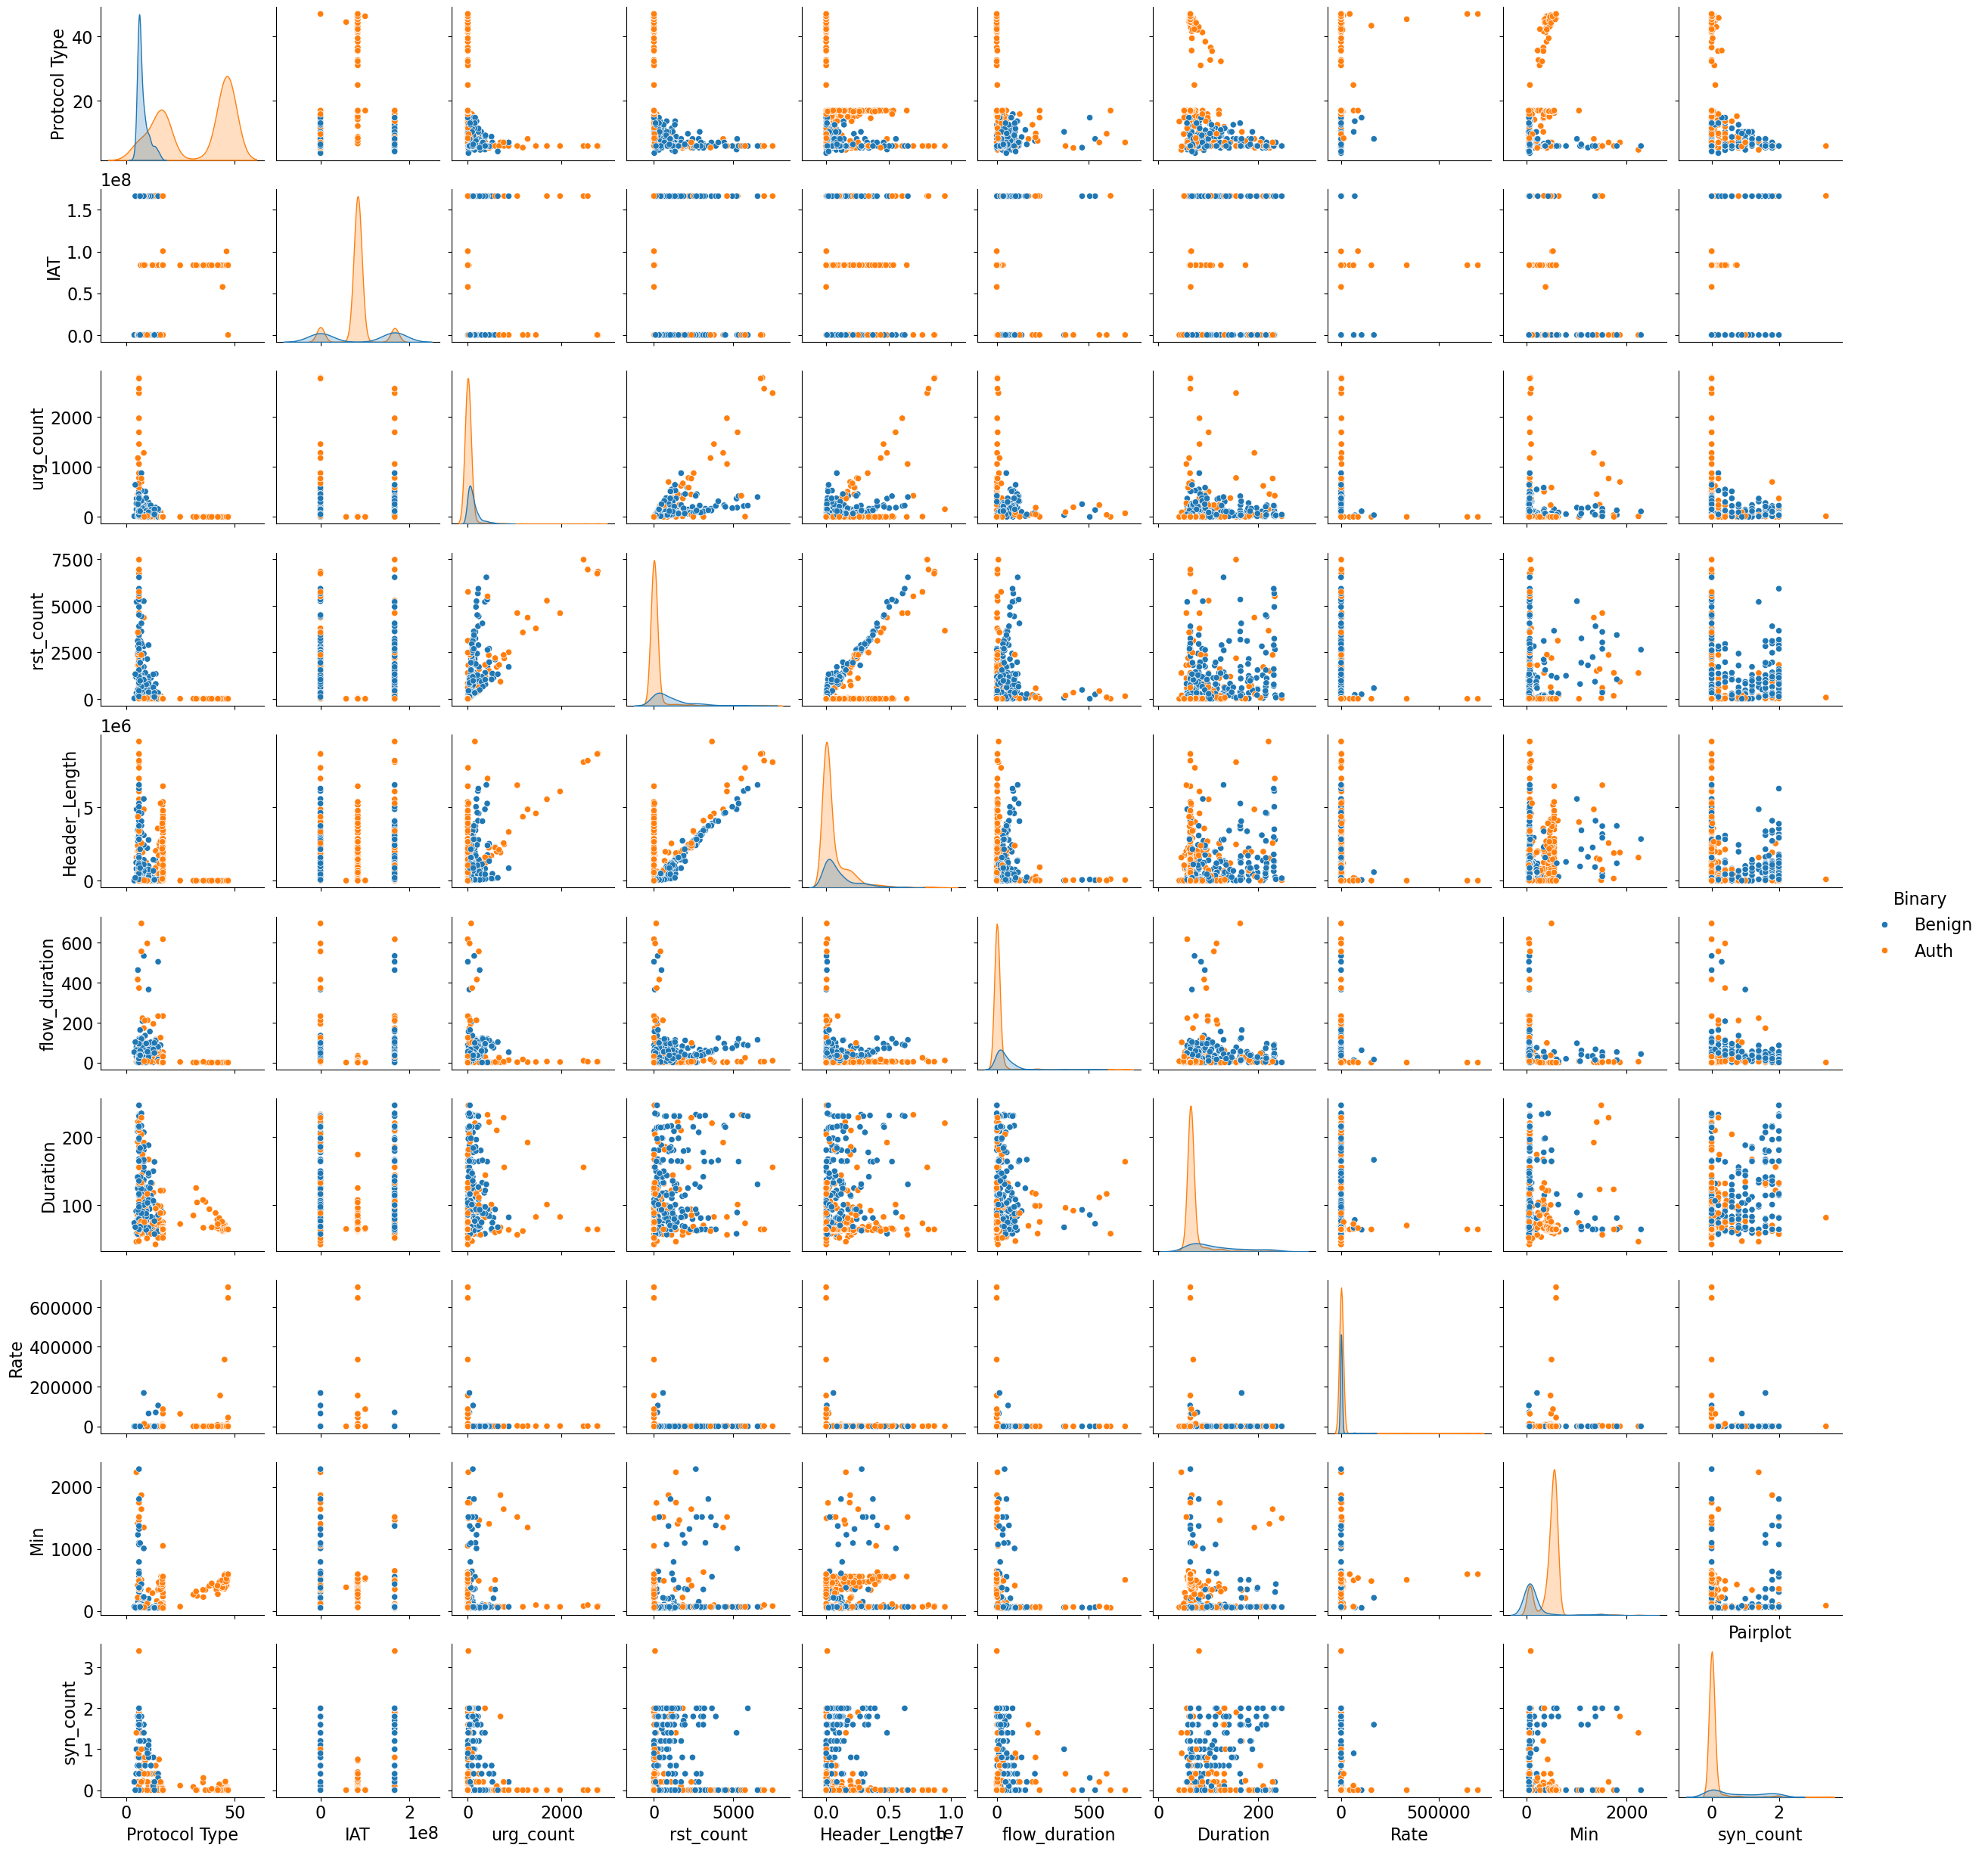

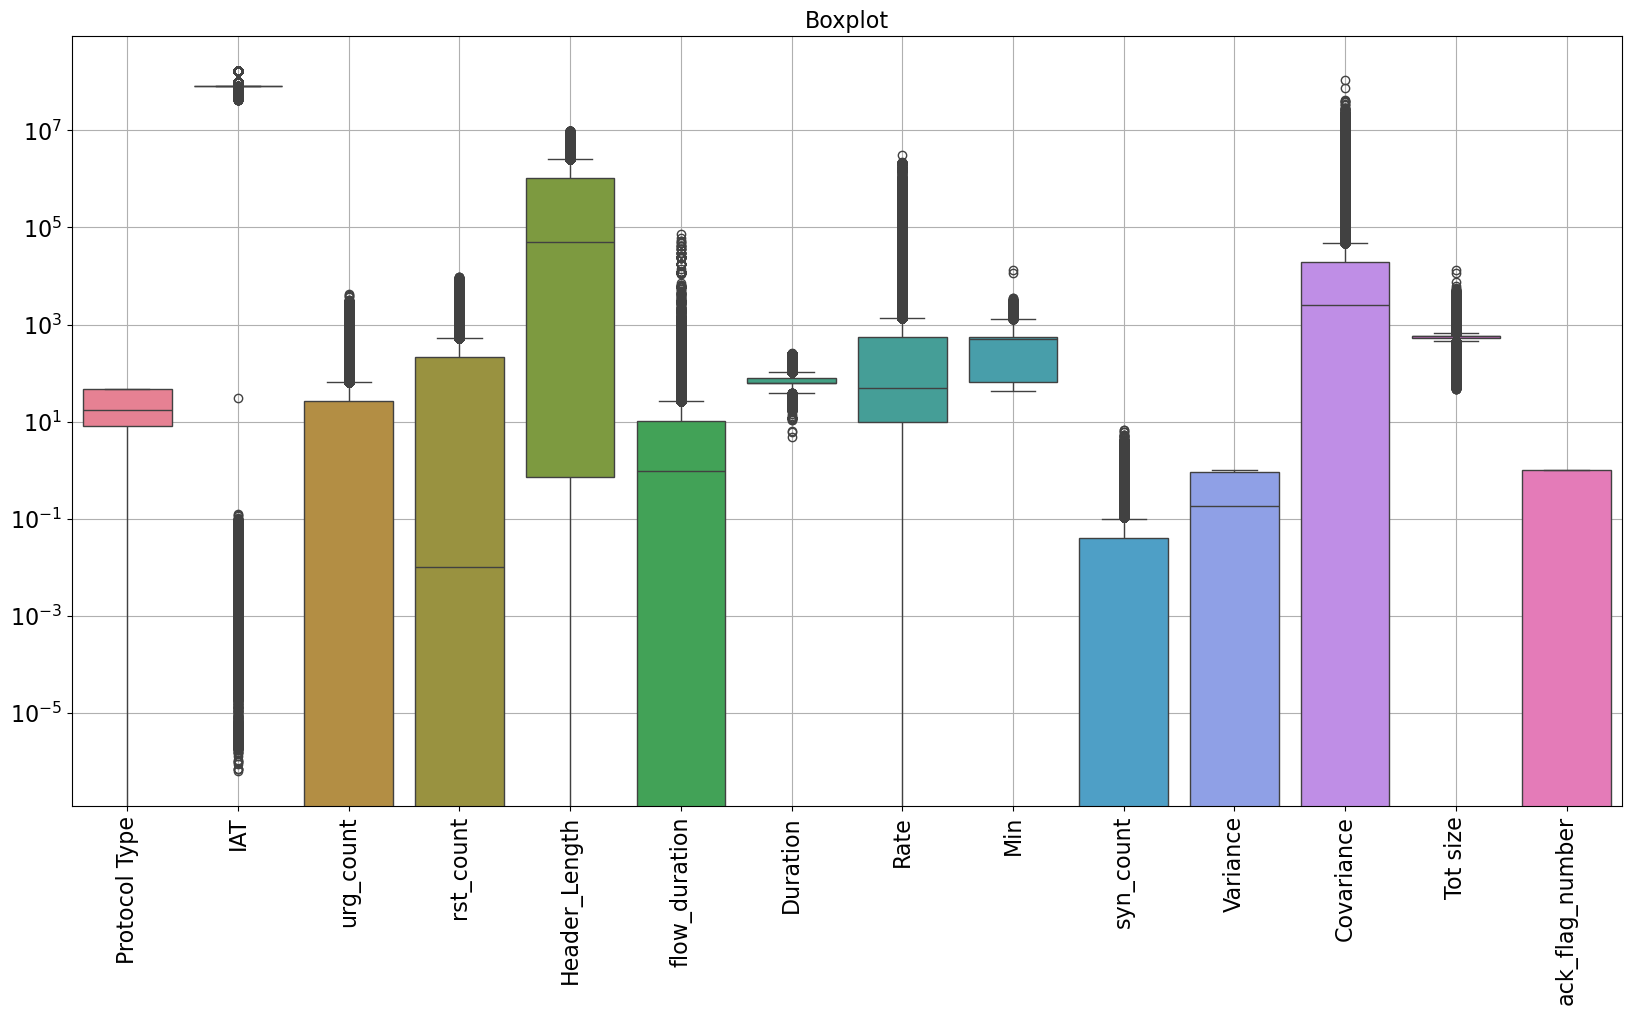

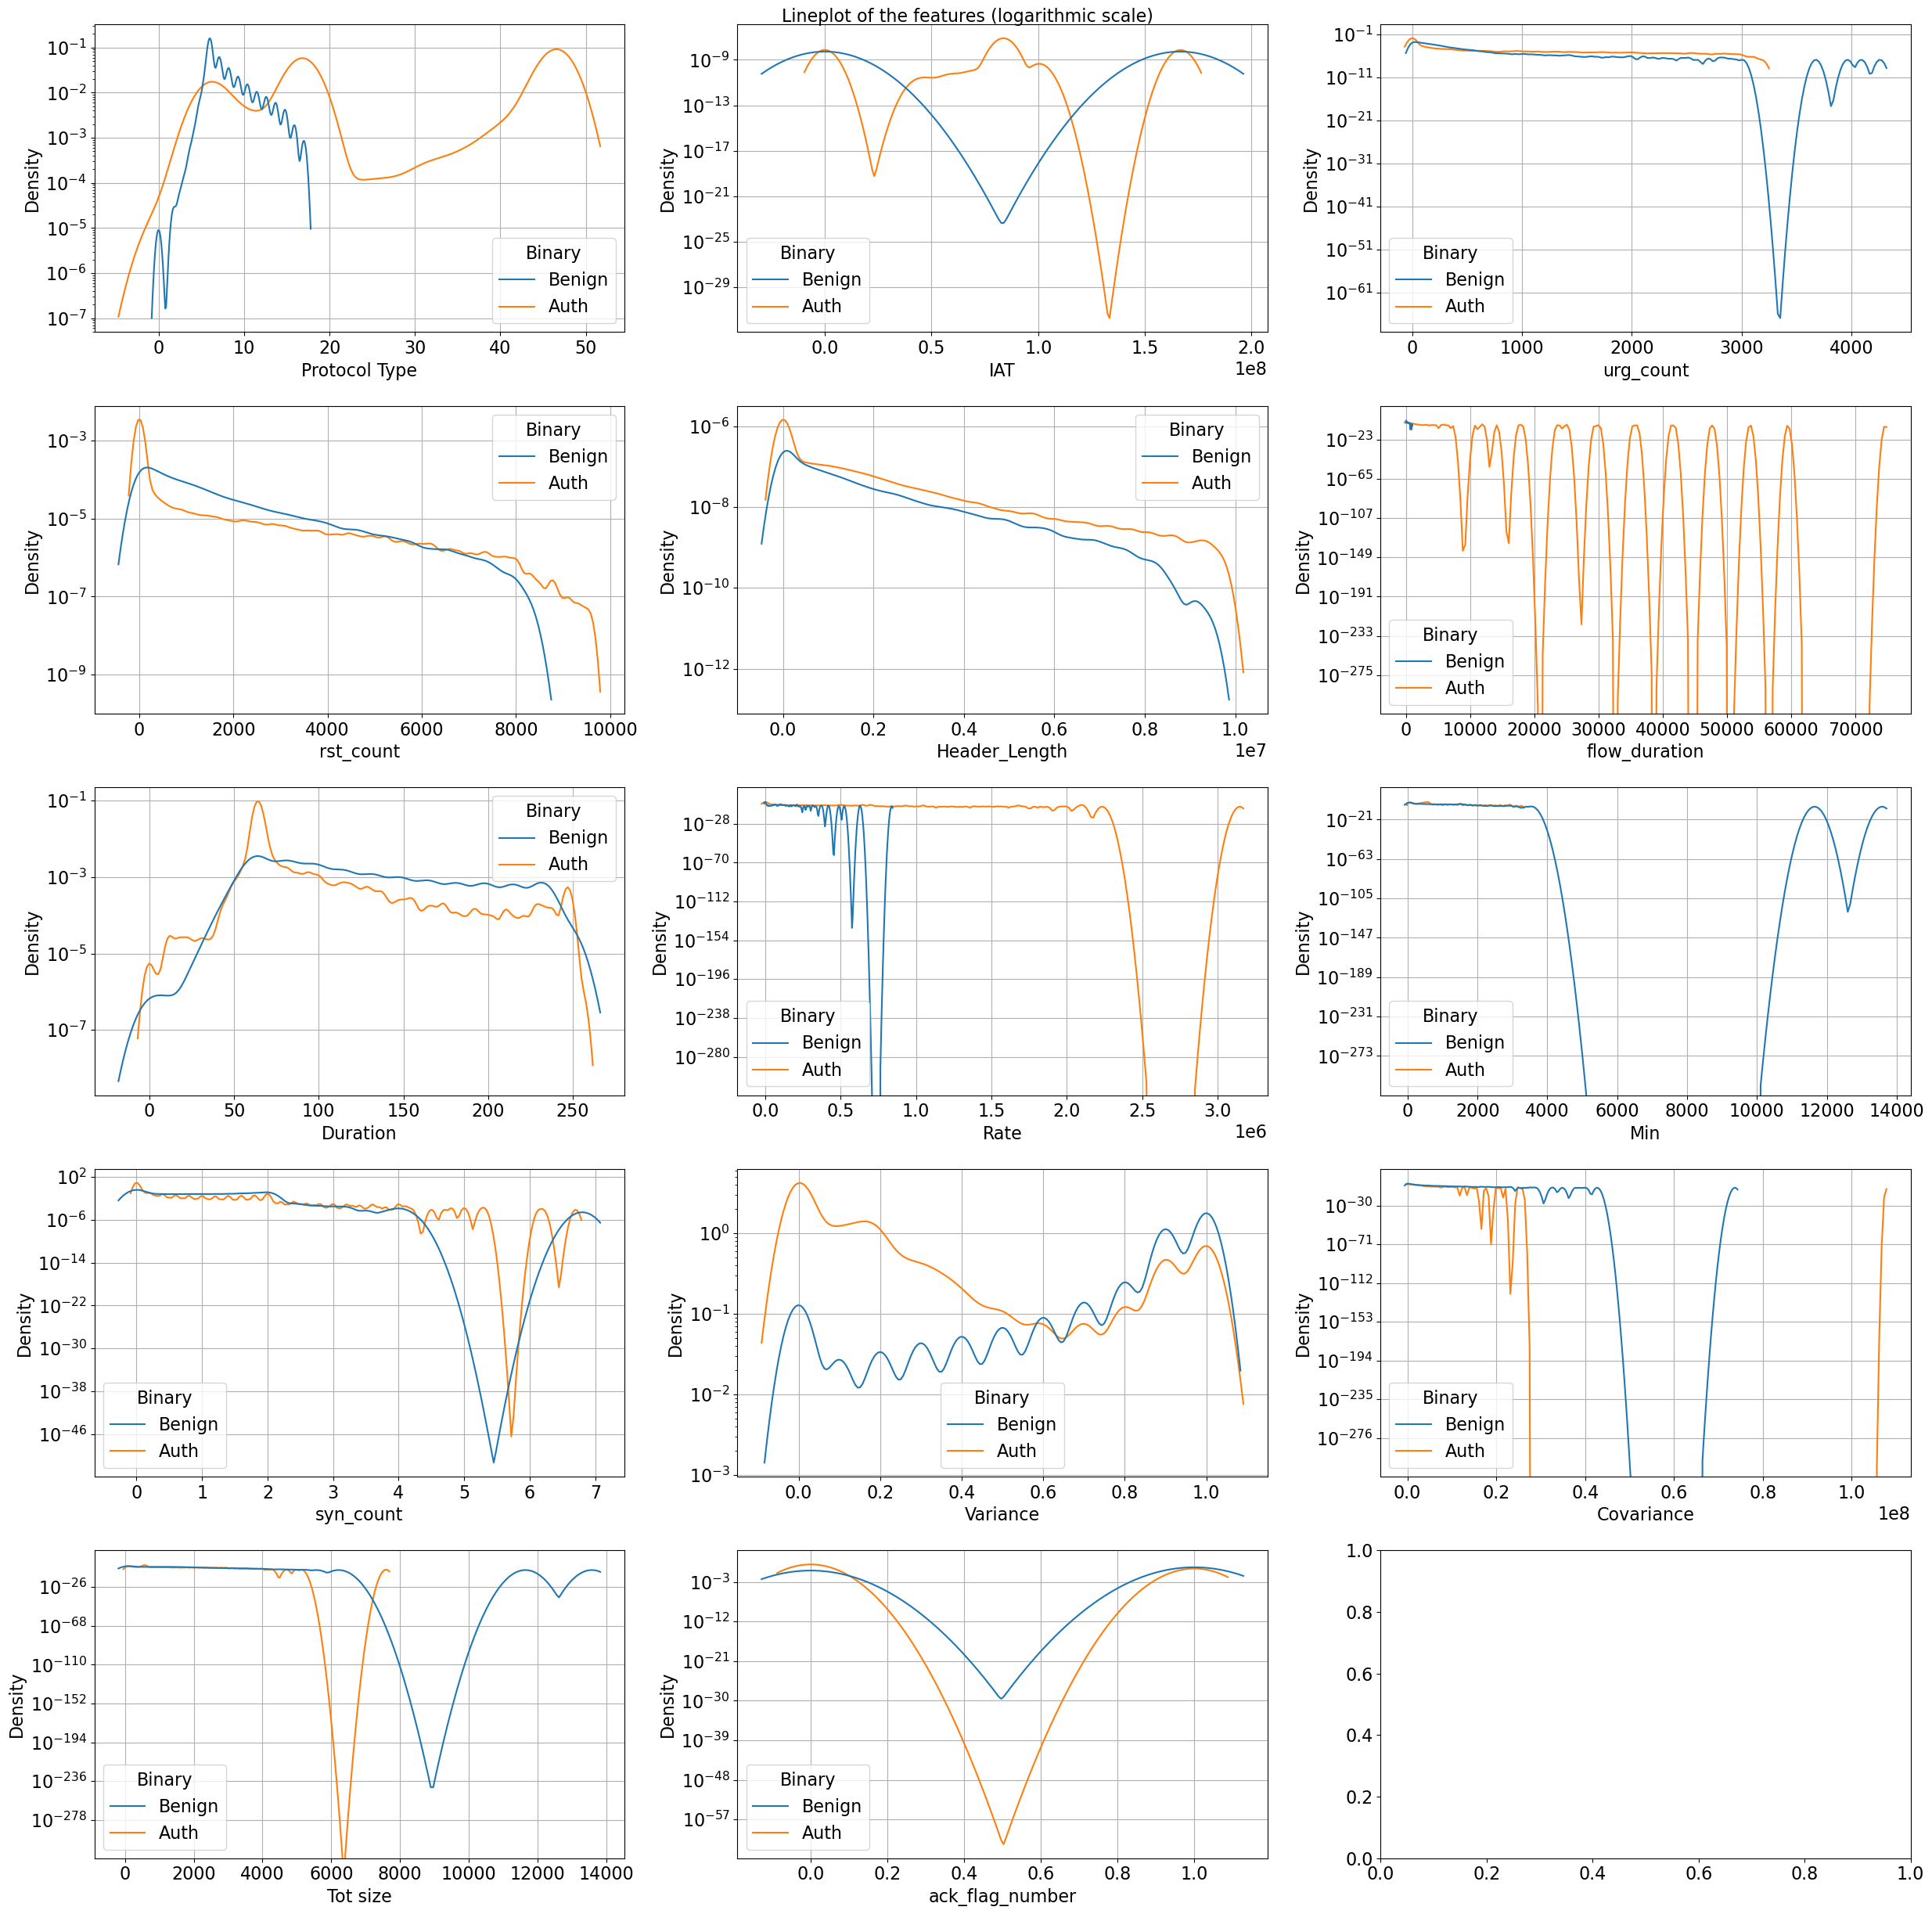

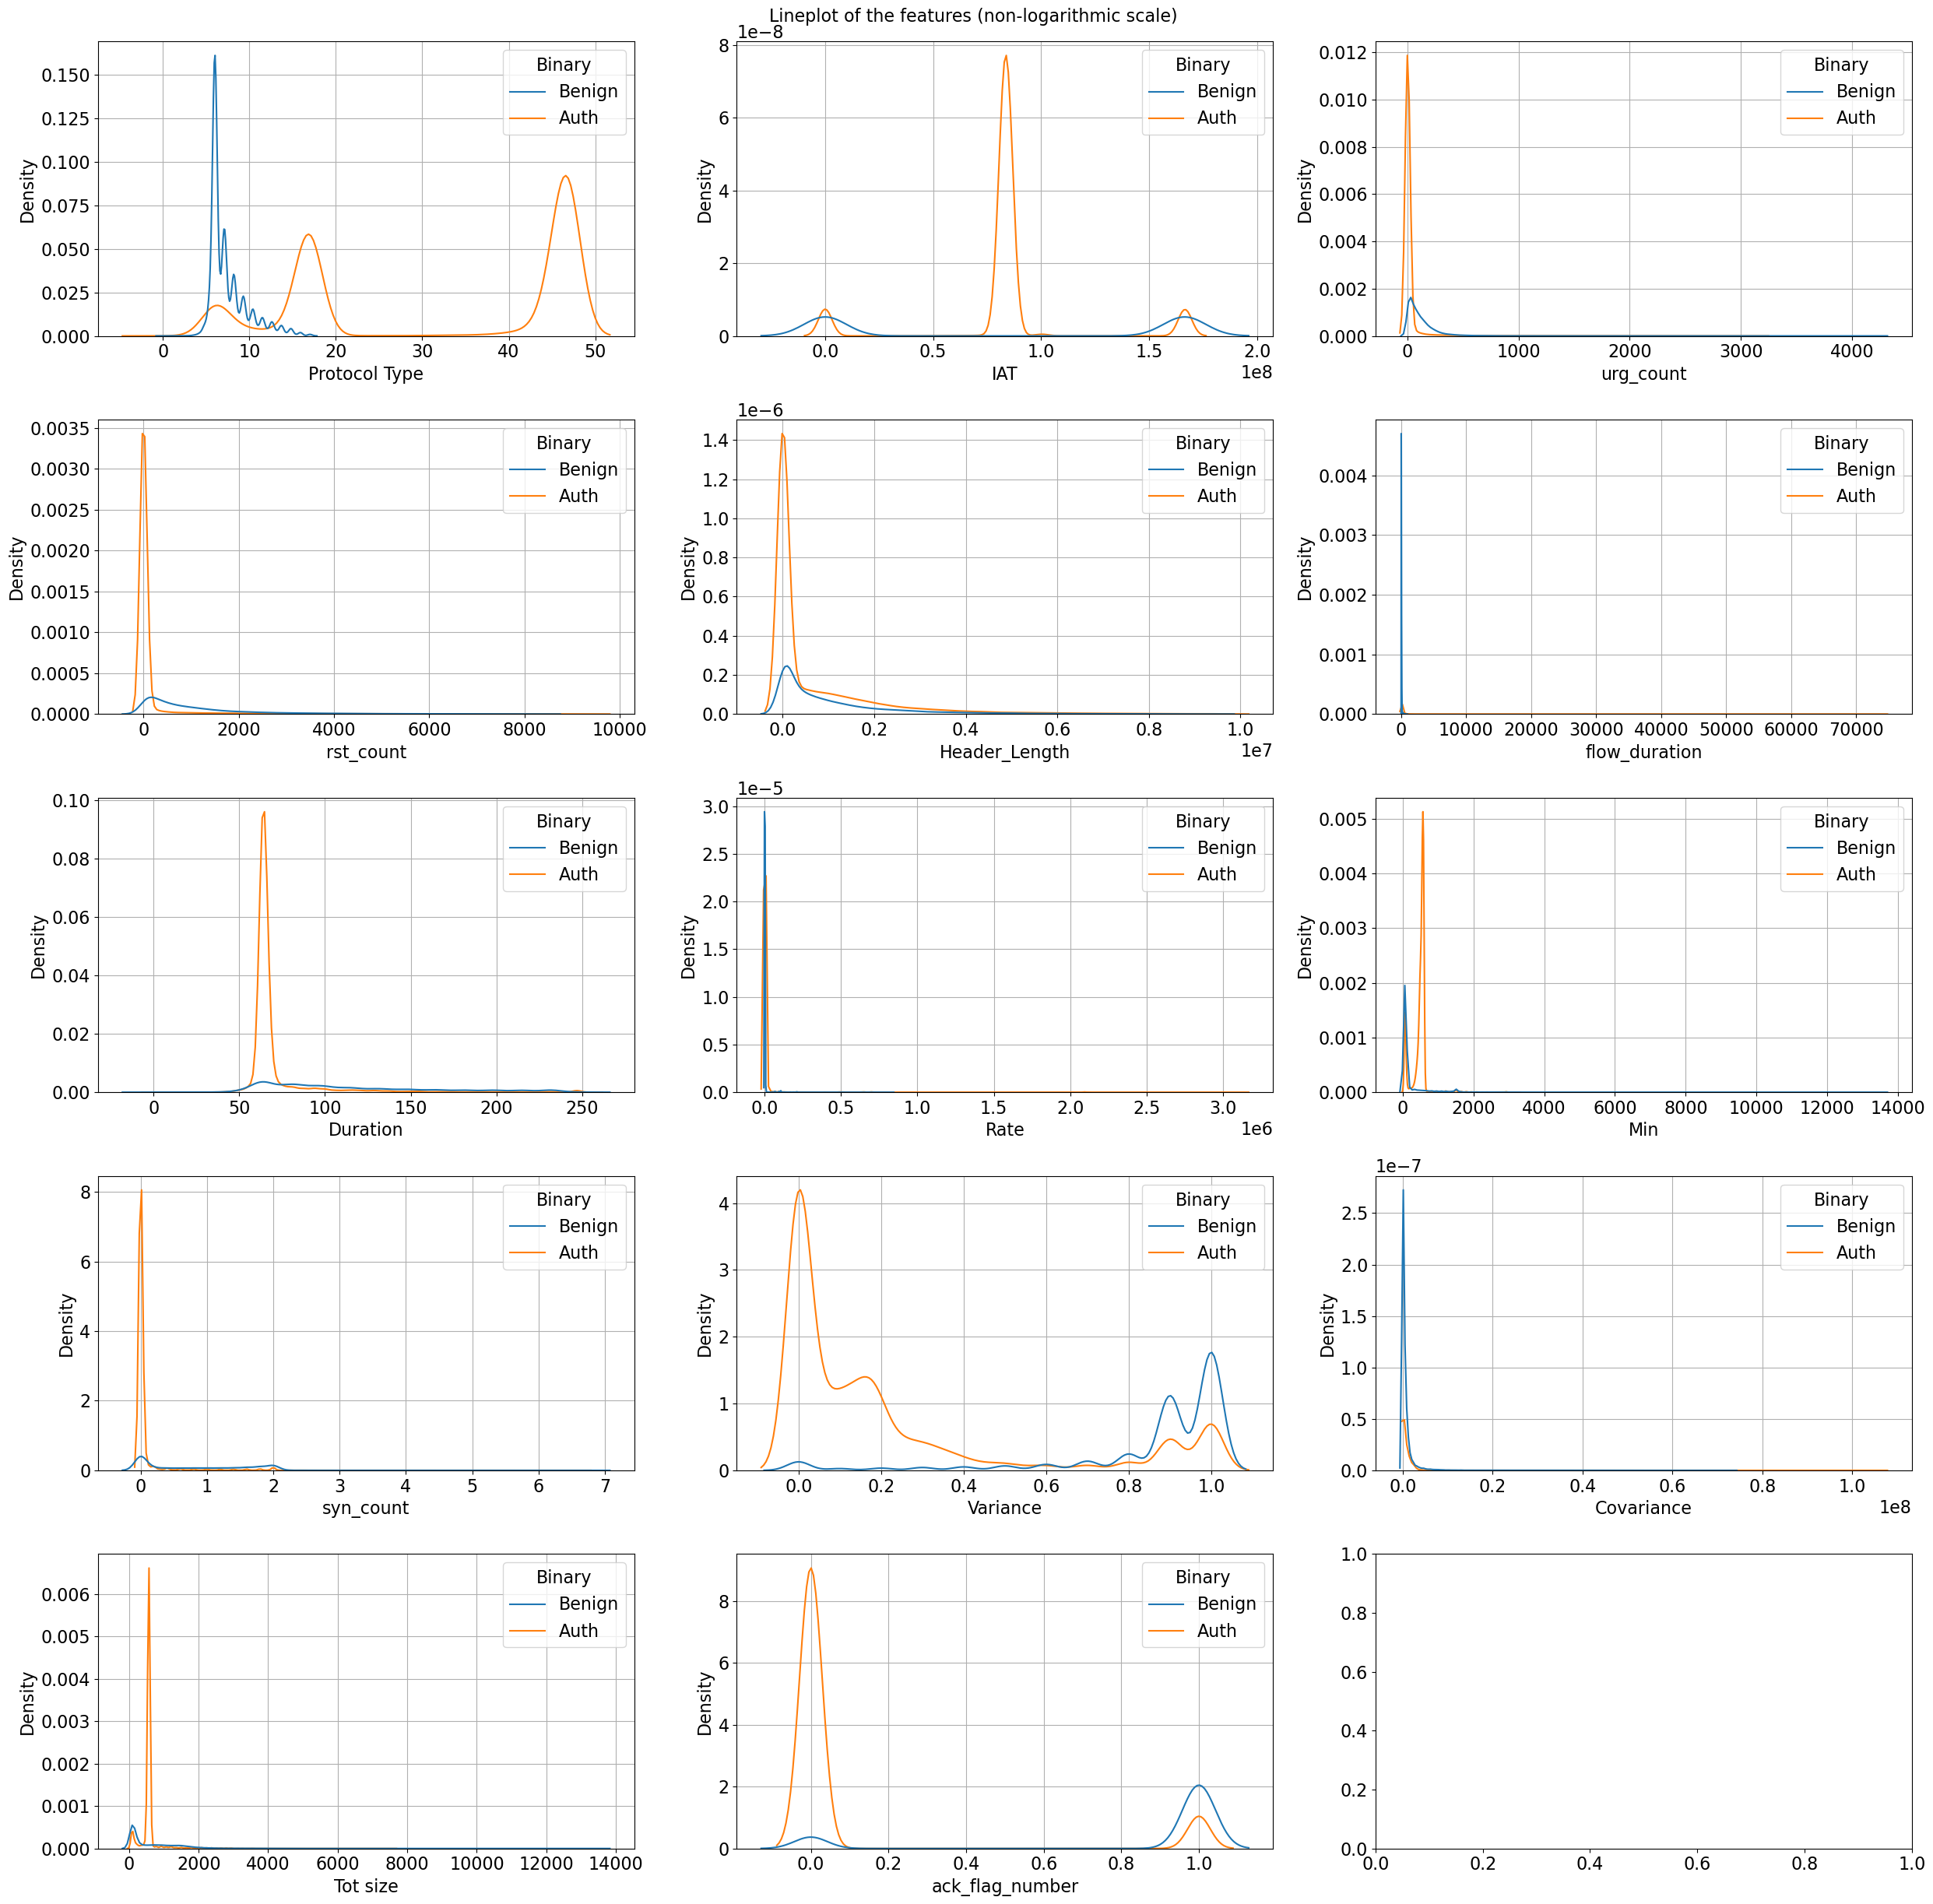

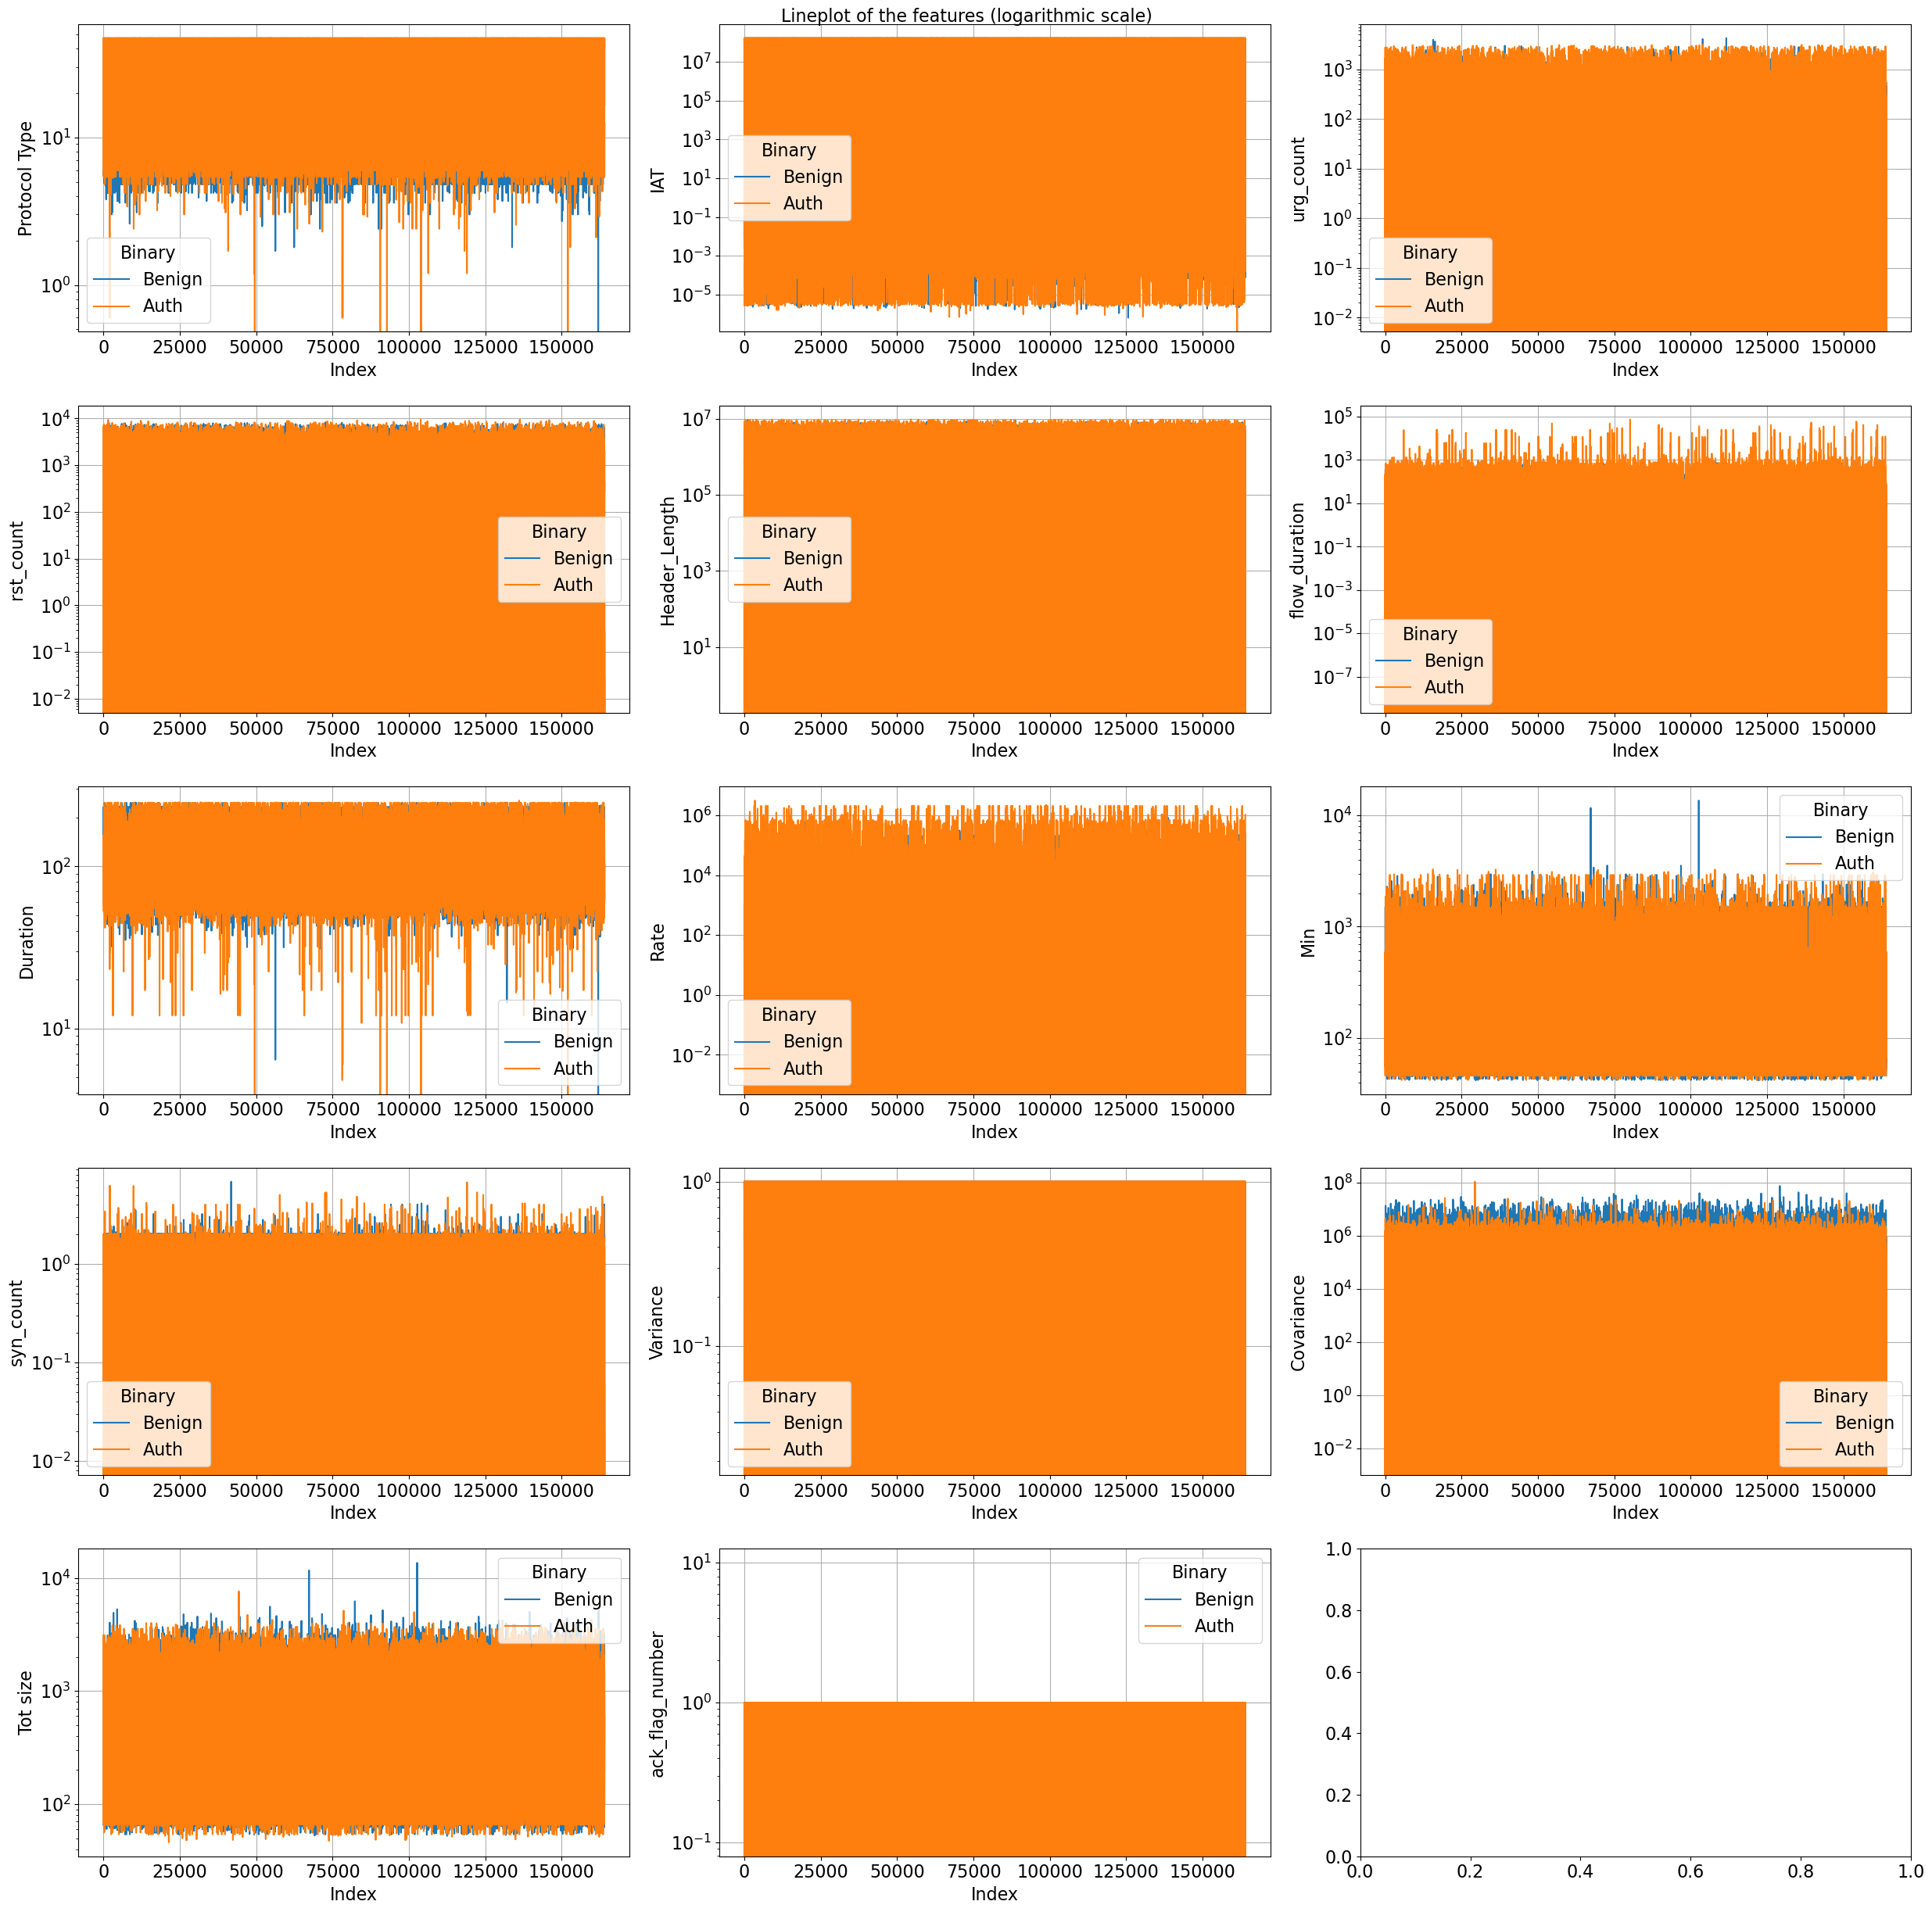

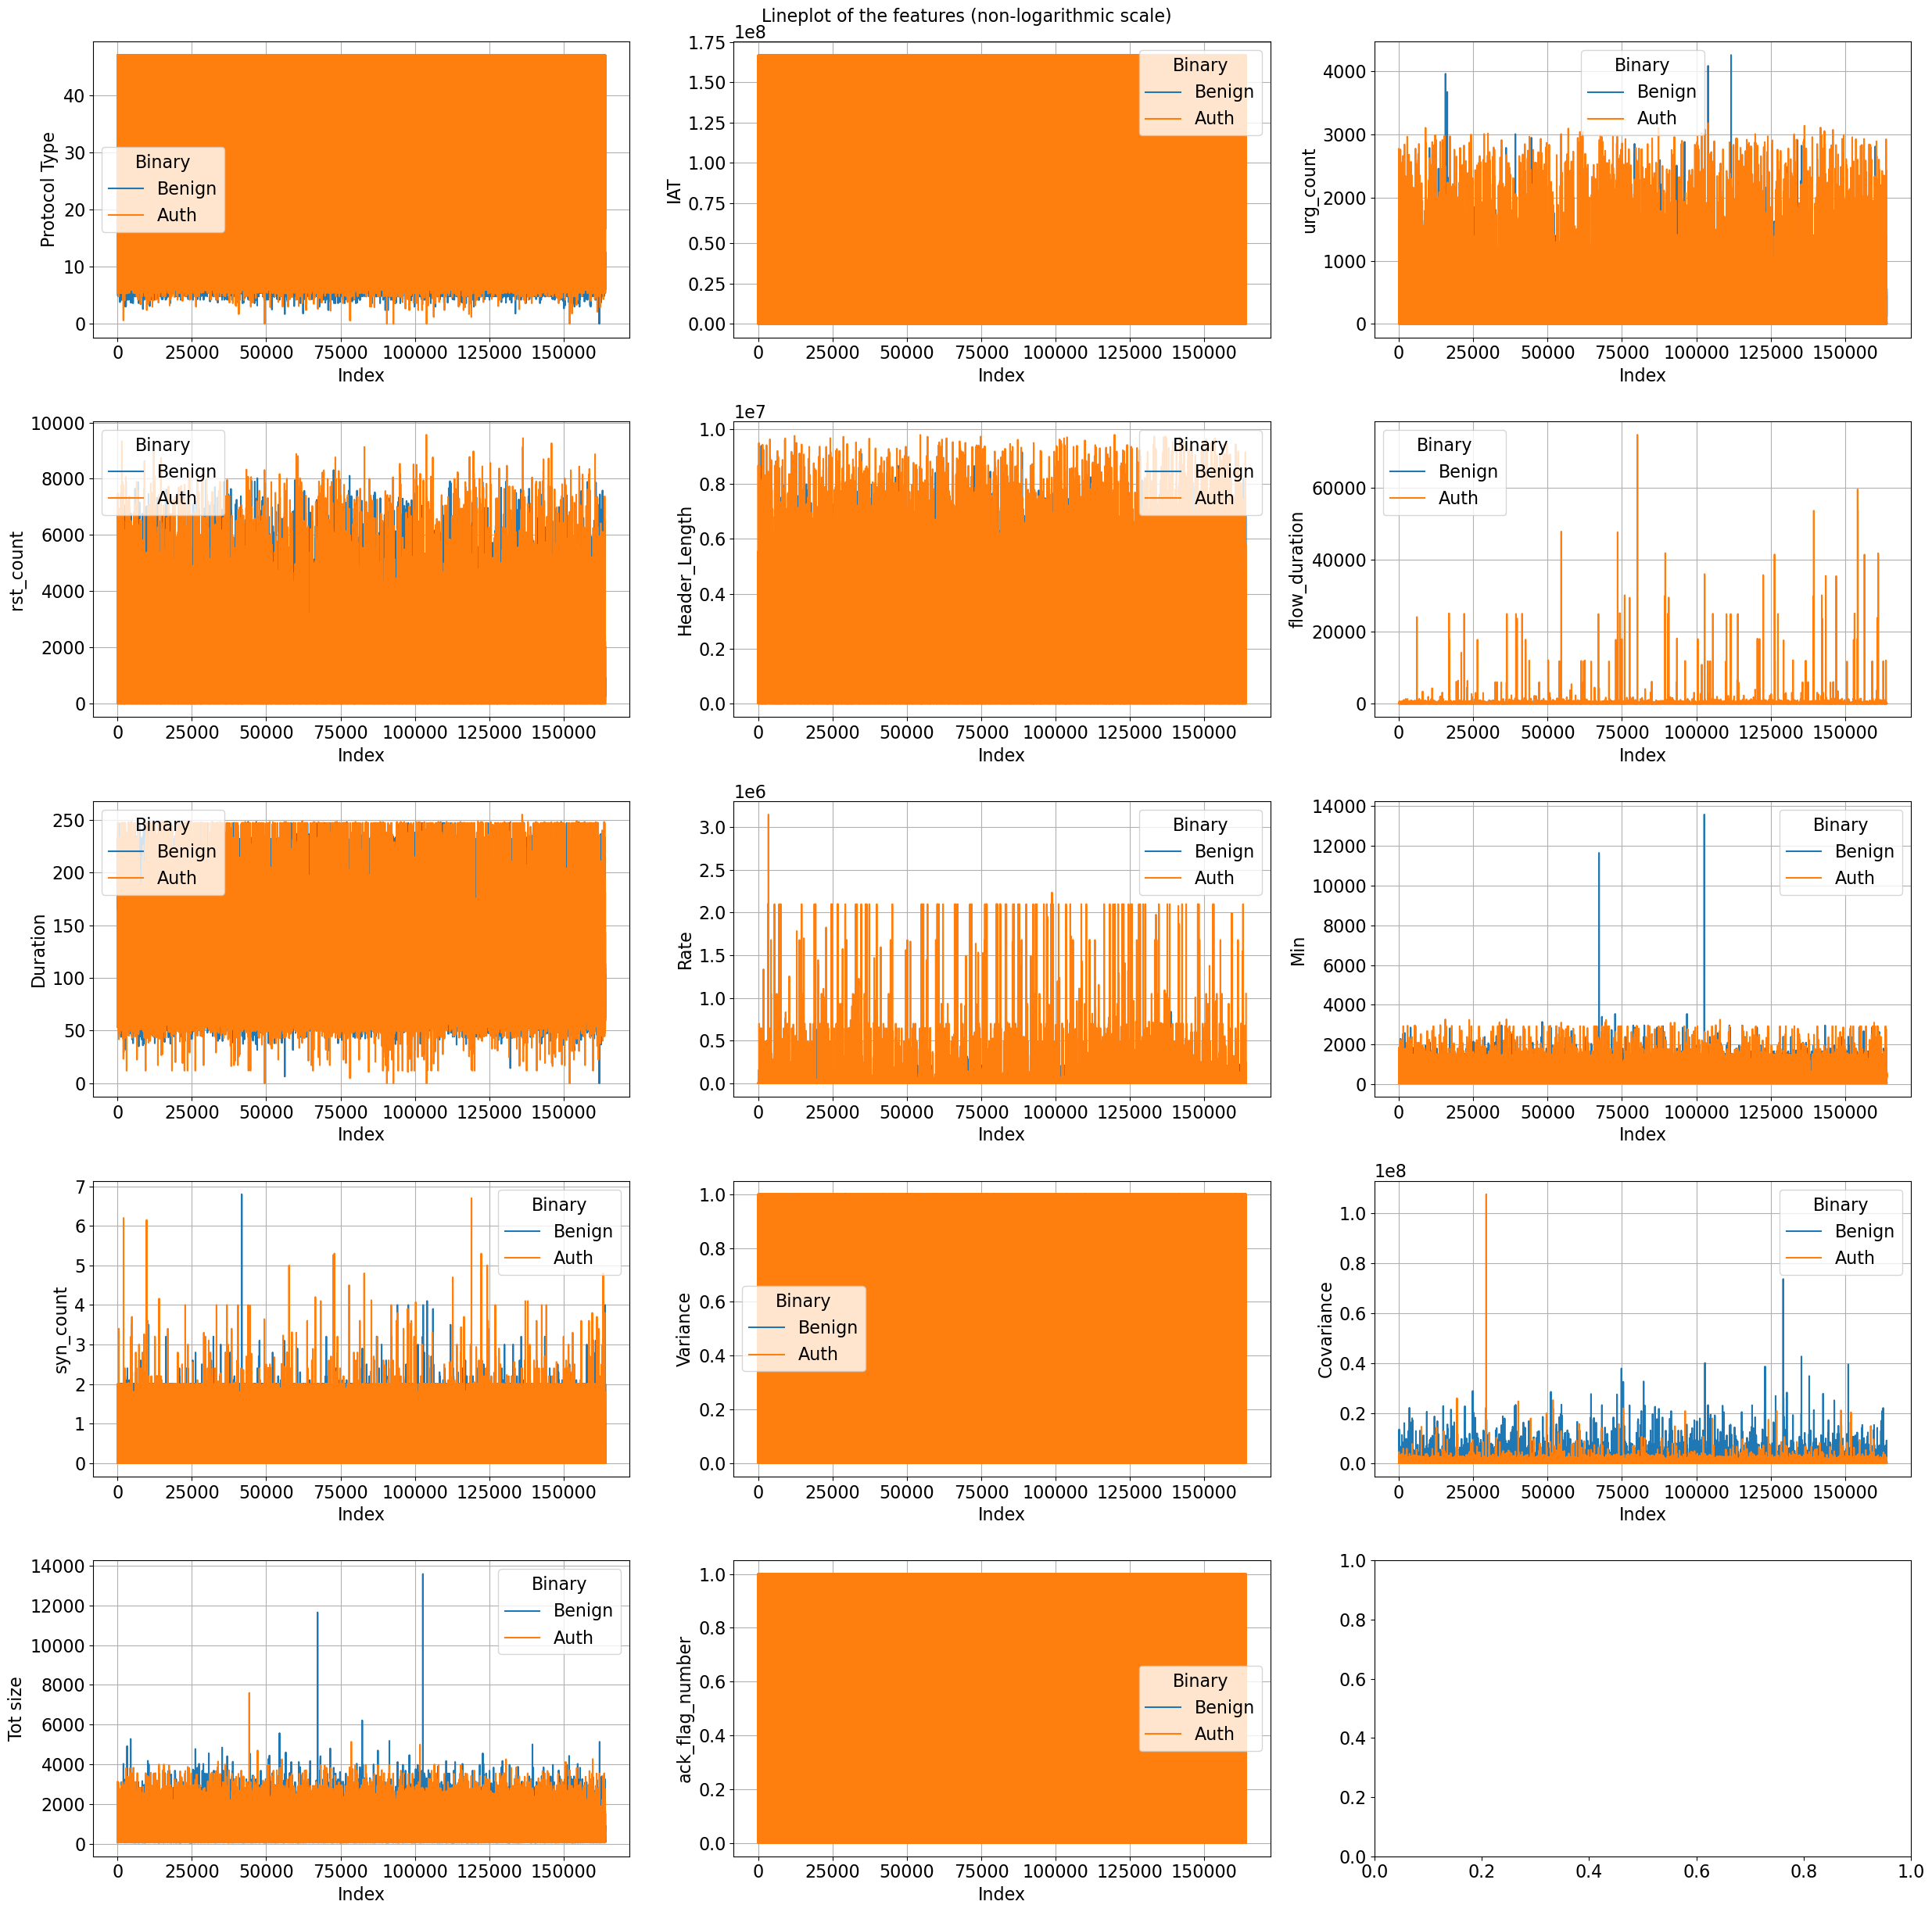

In [12]:
# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Correlation Matrix (sf).png', 'Correlation Matrix (sf)', lower=True)
plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[X_columns], model_path_binary+'Correlation Matrix (all features).png', 'Correlation Matrix (all features)', labels=False, lower=True)

if len(selected_X) > 10:
    new_selected_X = selected_X[:10]
else:
    new_selected_X = selected_X
    
pairplot_binary = new_selected_X.copy()
pairplot_binary.append('Binary')
plot_pairplot(read_csv_file(train_sets[0], file_path)[pairplot_binary].iloc[:1000], model_path_binary+'Pairplot.png', 'Binary', 'Pairplot')

plot_boxplot(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Boxplot.png', 'Boxplot')

# print("Nb features:", len(selected_X))
plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'KDE plot (logarithmic scale).png', 'Binary', figsize=(25, 25), yscaleLog=True)
plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'KDE plot (non-logarithmic scale).png', 'Binary', figsize=(25, 25), yscaleLog=False)

plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'Lineplot (logarithmic scale).png', 'Binary', figsize=(25, 25), yscaleLog=True)
plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'Lineplot (non-logarithmic scale).png', 'Binary', figsize=(25, 25), yscaleLog=False)

#### Display performance

In [9]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [11]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)

Model  Accuracy Training  Recall Training  \
9     Voting (Cat, XGB, RF)           0.993540         0.994797   
10            Bagging (Cat)           0.989455         0.990524   
4                       Cat           0.990150         0.991135   
11  Stacking (Cat, XGB, RF)           0.994851         0.995248   
3                       XGB           0.988061         0.988909   
16                   SF_Cat           0.989385         0.990221   
13                    SF_RF           0.999997         0.999995   
1                        RF           0.999995         0.999994   
15                   SF_XGB           0.987368         0.988095   
5                     LIGHT           0.983138         0.983981   
17                 SF_LIGHT           0.981996         0.982380   
14                    SF_ET           1.000000         0.999999   
2                        ET           0.999997         0.999996   
0                        DT           0.999997         0.999995   
6                    GBoost           0.974160         0.973539   
12                    SF_DT           0.999998         0.999996   
18                SF_GBoost           0.972441         0.971113   
7                  Adaboost           0.968011         0.966038   
19              SF_Adaboost           0.967564         0.965976   
8                       MLP           0.962940         0.961238   
20                   SF_MLP           0.957473         0.955224   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
9             0.988611     0.991651          0.983078        0.982873   
10            0.982459     0.986400          0.982903        0.982710   
4             0.983602     0.987288          0.982839        0.982192   
11            0.991449     0.993329          0.982676        0.981450   
3             0.980505     0.984607          0.982309        0.981878   
16            0.982552     0.986303          0.982019        0.980898   
13            0.999996     0.999996          0.981746        0.980467   
1             0.999992     0.999993          0.981467        0.980584   
15            0.979547     0.983716          0.981317        0.980416   
5             0.973015     0.978323          0.981012        0.981161   
17            0.971654     0.976849          0.979956        0.979732   
14            1.000000     1.000000          0.979216        0.979205   
2             0.999996     0.999996          0.978054        0.979246   
0             0.999996     0.999996          0.974329        0.966269   
6             0.960680     0.966859          0.973566        0.972694   
12            0.999999     0.999998          0.973075        0.964356   
18            0.958644     0.964642          0.971839        0.970150   
7             0.952551     0.959012          0.967901        0.966484   
19            0.951630     0.958482          0.967311        0.965420   
8             0.944964     0.952678          0.960378        0.957175   
20            0.937435     0.945810          0.956633        0.958436   

    Precision Testing  F1 Testing   FU_rate   FL_rate     FU    FL  Total rows  
9            0.973749    0.978191  0.012369  0.004553   7843  2887      634100  
10           0.973473    0.977968  0.012507  0.004589   7931  2910      634100  
4            0.973746    0.977866  0.012194  0.004968   7732  3150      634100  
11           0.973977    0.977633  0.011851  0.005472   7515  3470      634100  
3            0.972761    0.977199  0.012758  0.004933   8090  3128      634100  
16           0.972884    0.976798  0.012422  0.005559   7877  3525      634100  
13           0.972597    0.976442  0.012498  0.005756   7925  3650      634100  
1            0.971847    0.976104  0.013022  0.005512   8257  3495      634100  
15           0.971634    0.975913  0.013118  0.005565   8318  3529      634100  
5            0.970332    0.975574  0.014181  0.004807   8992  3048      634100  
17           0.969030    0.974212  0.014666  0.00

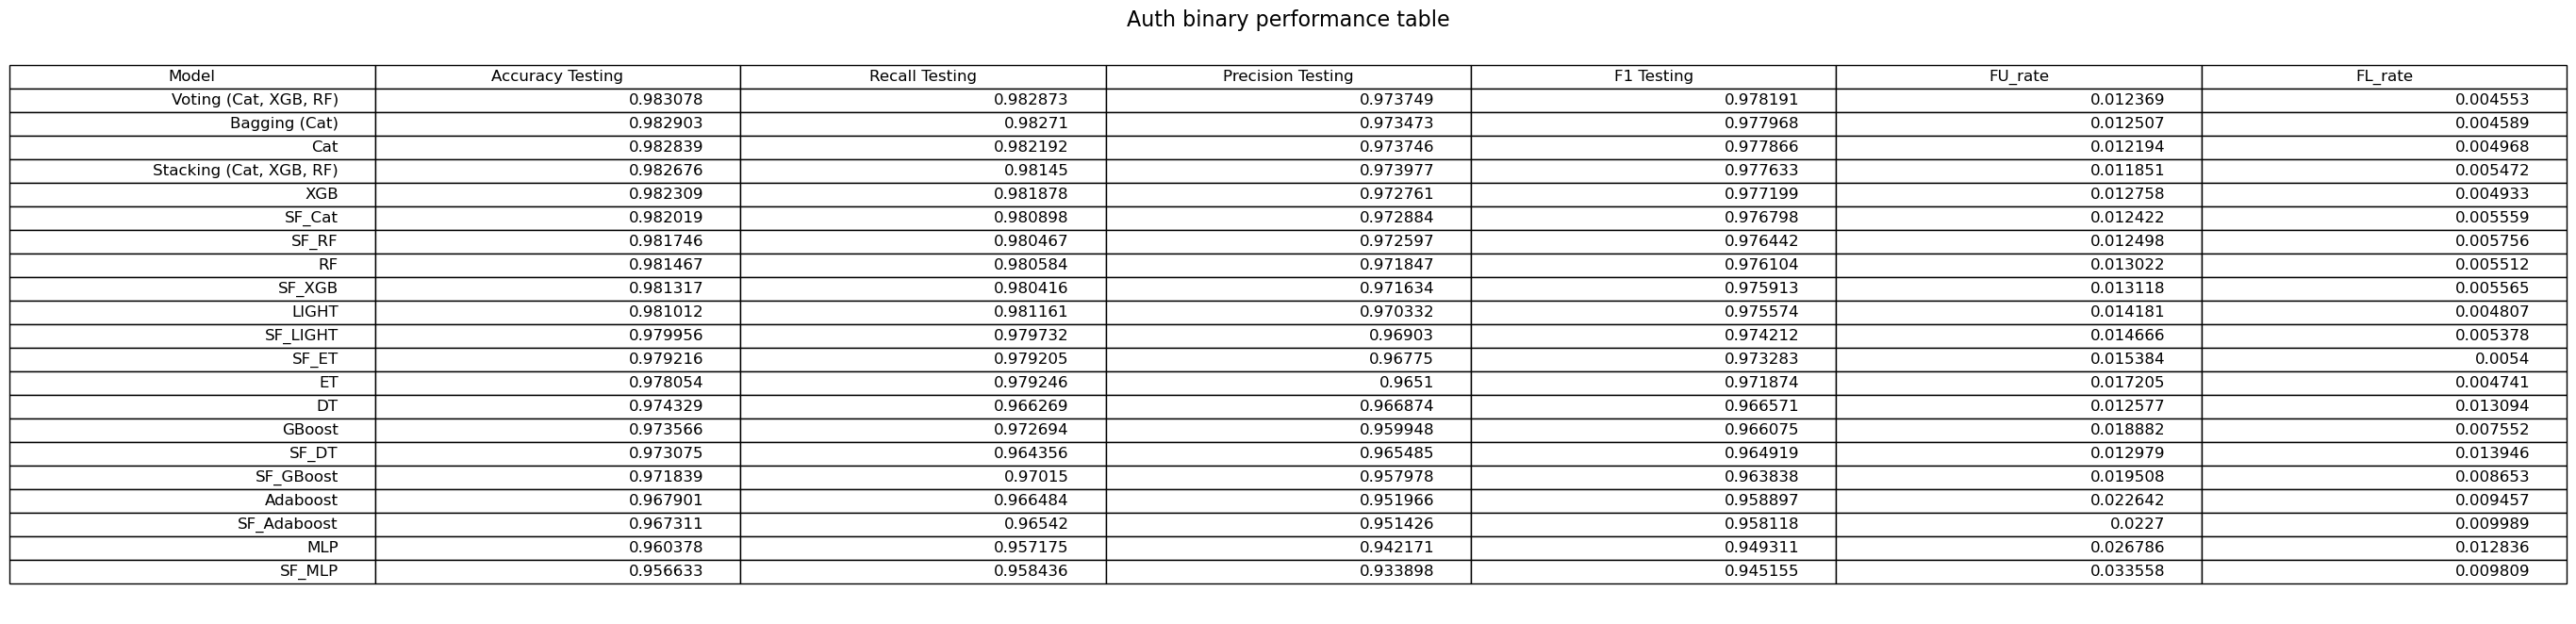

In [10]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_binary+'Performance table.png', 'Auth binary performance table', figsize=(35, 8))

## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.963103  0.963103   0.962985  0.962626               11161   

   Mispredicted rate  Total rows  
0           3.689697      302491

## Second model (All Recon classes)

### Building model

In [10]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [11]:
filter_name = [
    {'name': 'Auth', 'type': '='},
]
filter_cols = ['Binary']

In [7]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes, X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [1:23:04<00:00, 1661.62s/it]


['.\\Auth_model\\All_classes\\encoder.joblib']

#### Complex models

In [12]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, LIGHT)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (XGB)",
        "Model": BaggingClassifier(base_estimator=XGBClassifier(random_state = 42), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, LIGHT, XGB)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            final_estimator=XGBClassifier(random_state = 42),
            cv=5)
    },
]

In [13]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + "complex_", X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 3/3 [1:55:58<00:00, 2319.59s/it]


['.\\Auth_model\\All_classes\\encoder.joblib']

#### Feature Importance

.\Auth_model\All_classes\model_DT.joblib
.\Auth_model\All_classes\model_RF.joblib
.\Auth_model\All_classes\model_ET.joblib
.\Auth_model\All_classes\model_XGB.joblib
.\Auth_model\All_classes\model_Cat.joblib
.\Auth_model\All_classes\model_LIGHT.joblib
.\Auth_model\All_classes\model_GBoost.joblib
.\Auth_model\All_classes\model_Adaboost.joblib


100%|██████████| 8/8 [00:00<00:00, 91.28it/s]


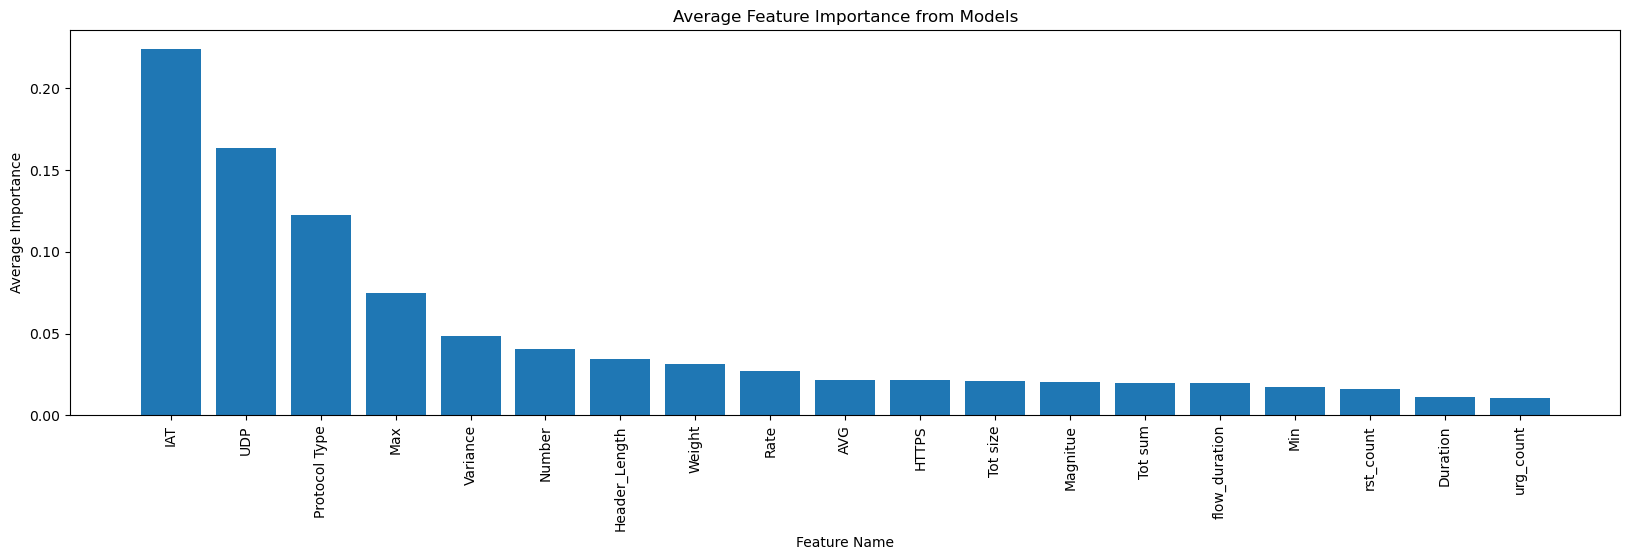

Feature  Average Importance
39            IAT            0.224448
27            UDP            0.163792
2   Protocol Type            0.122257
35            Max            0.074666
44       Variance            0.048739
40         Number            0.040672
1   Header_Length            0.034544
45         Weight            0.031264
4            Rate            0.026796
36            AVG            0.021721
20          HTTPS            0.021669
38       Tot size            0.020968
41       Magnitue            0.020610
33        Tot sum            0.019836
0   flow_duration            0.019626
34            Min            0.017347
18      rst_count            0.015917
3        Duration            0.011316
17      urg_count            0.010842

In [11]:
# Import encoder and get all features
encoder = get_encoder(model_path_all_classes, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_all_classes)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Auth\\All_classes\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

### Display performance

In [15]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [14]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

Model  Accuracy Training  Recall Training  \
9     Voting (Cat, XGB, LIGHT)           0.993822         0.971818   
10               Bagging (XGB)           0.994257         0.968562   
3                          XGB           0.995024         0.976153   
5                        LIGHT           0.969947         0.951957   
4                          Cat           0.992263         0.950503   
1                           RF           0.999998         0.999978   
11  Stacking (Cat, LIGHT, XGB)           0.977392         0.934748   
6                       GBoost           0.983537         0.904020   
0                           DT           0.999999         0.999998   
2                           ET           0.999999         0.999999   
8                          MLP           0.915010         0.758196   
7                     Adaboost           0.802470         0.731473   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
9             0.985805     0.978507          0.986059        0.907644   
10            0.987333     0.977387          0.985965        0.904644   
3             0.988864     0.982258          0.985725        0.907689   
5             0.870641     0.894822          0.985501        0.908180   
4             0.982324     0.964675          0.985295        0.904258   
1             0.999996     0.999987          0.984886        0.891912   
11            0.965938     0.948507          0.984162        0.901592   
6             0.961478     0.926797          0.982426        0.890727   
0             0.999997     0.999998          0.980806        0.901106   
2             0.999999     0.999999          0.980220        0.860262   
8             0.851782     0.781346          0.942349        0.774716   
7             0.730459     0.698269          0.729908        0.666806   

    Precision Testing  F1 Testing   FU_rate   FL_rate     FU      FL  \
9            0.958918    0.927948  0.007745  0.006196   3637    2910   
10           0.966577    0.928009  0.007926  0.006109   3722    2869   
3            0.958916    0.928047  0.008021  0.006254   3767    2937   
5            0.940614    0.922097  0.007738  0.006761   3634    3175   
4            0.957101    0.925001  0.008232  0.006473   3866    3040   
1            0.965471    0.917616  0.008752  0.006363   4110    2988   
11           0.951756    0.921664  0.009418  0.006420   4423    3015   
6            0.957032    0.915455  0.011062  0.006512   5195    3058   
0            0.895413    0.898163  0.009731  0.009463   4570    4444   
2            0.953465    0.886546  0.012314  0.007466   5783    3506   
8            0.851774    0.792475  0.033863  0.023787  15903   11171   
7            0.866747    0.656522  0.032290  0.237802  15164  111677   

    Total rows  
9       469621  
10      469621  
3       469621  
5       469621  
4       469621  
1       469621  
11      469621  
6       469621  
0       469621  
2       469621  
8       469621  
7       469621

## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Accuracy   Recall  Precision        F1  Mispredicted count  \
0   0.88372  0.88372   0.847486  0.864784                8014   

   Mispredicted rate  Total rows  
0            0.11628       68920

In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
